# Resolución Trabajo Práctico 01

## Integrantes

- Gaspar Acevedo Zain

## Carga del dataset

### Imports y carga del dataset

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import entropy

In [2]:
df_sneep_2023_csv = pd.read_csv("../dataset/sneep-2023.csv")

In [3]:
# Configuramos el output display con 100 filas
pd.options.display.max_rows = 100

## Helper functions

In [272]:
# Devuelve datos relativos a columnas numéricas, tales como media, skewness, kurtosis, entre otros
def get_metrics_from_numeric_column(data, column):
    skewness = (data[column]).skew()
    kurtosis = (data[column]).kurt()
    media = (data[column]).mean()
    moda = (data[column]).mode()[0]
    mediana = (data[column]).median()
    var = (data[column]).var()
    std = (data[column]).std()
    min = (data[column]).min()
    max = (data[column]).max()

    return media, moda, mediana, min, max, var, std, skewness, kurtosis

In [ ]:
# Devuelve métricas relacionadas al rango Intercuartil
def get_iqr_metrics(data, column):
    Q1 = data[column].quantile(0.25)
    Q2 = data[column].quantile(0.50)
    Q3 = data[column].quantile(0.75)

    IQR = Q3 - Q1
    min_iqr = Q1 - 1.5*IQR
    max_iqr = Q3 + 1.5*IQR

    return Q1, Q2, Q3, IQR, min_iqr, max_iqr

In [273]:
# Código provisto por la materia
# Función para graficar Histogramas, junto con skewness, kurtosis, media, varianza, y/o desvío estandar
def plot_histograma(data, column, figsize=(6, 3), bins=15, kde=True, mvd=True, snk=False):
    media, moda, mediana, min, max, var, std, skewness, kurtosis = get_metrics_from_numeric_column(data, column)
    
    plt.figure(figsize=figsize)
    plt.grid(axis='y')
    sns.histplot(data[column], bins=bins, kde=kde)
    if snk:
        plt.figtext(0.7, 0.8, f'Asimetría: {skewness:.2f}', fontsize=10, color='blue')
        plt.figtext(0.715, 0.73, f'Curtosis: {kurtosis:.2f}', fontsize=10, color='blue')
    plt.axvline(media, color='red', linestyle='--', label='Media')
    plt.axvline(moda, color='purple', linestyle='--', label='Moda')
    plt.axvline(mediana, color='green', linestyle='--', label='Mediana')
    if mvd:
        plt.figtext(0.15, 0.8, f'Media: {media:.2f}', fontsize=10, color='red')
        plt.figtext(0.15, 0.73, f'Moda: {moda:.2f}', fontsize=10, color='purple')
        plt.figtext(0.15, 0.66, f'Mediana: {mediana:.2f}', fontsize=10, color='green')
        plt.figtext(0.15, 0.59, f'Var: {var:.2f}', fontsize=10, color='black')
        plt.figtext(0.15, 0.52, f'Std: {std:.2f}', fontsize=10, color='black')
    plt.title(f'Variable: {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Frecuencia')
    plt.show()
    
    return

In [424]:
# Función para graficar un histograma, en función de los datos dados
def graficar_distribucion_histograma(data, col, titulo, xlabel, ylabel="Count", rotation=45):
    sns.countplot(x=col, data=data)
    plt.title(titulo)
    plt.xticks(rotation=rotation)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [426]:
# Función para graficar un crosstab, mediante un dataset, y dos columnas del mismo
def graficar_crosstab(data, col1, col2, titulo, xlabel, ylabel, figsize = (8,5), cmap="Blues", fmt='d', annotate=True):
    plt.figure(figsize=figsize)
    cross_tab = pd.crosstab(data[col1], data[col2])
    sns.heatmap(cross_tab, annot=annotate, fmt=fmt, cmap=cmap)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [ ]:
# Función para graficar un boxplot, dados un dataset, una columna (numérica) y una columna categórica sobre la cual hacer una subdivisión
def graficar_boxplot(data, col, col_division, titulo, loc='upper right', figsize=(10,4)):
    plt.figure(figsize=figsize)
    sns.boxplot(data=data, y=col, hue=col_division)
    plt.legend(title=titulo, loc=loc)
    plt.show()

In [439]:
# Grafica la frecuencia relativa de una variable dada
def graficar_frecuencias_relativas(data, col, titulo, xlabel, ylabel, dropna=False, figsize=(9,4), palette="viridis", loc="lower right"):
    total = len(data)
    relative_freq = data[col].value_counts(dropna=dropna) / total

    # Graficar frecuencias relativas
    plt.figure(figsize=figsize)
    sns.barplot(x=relative_freq.values, hue=relative_freq.index, palette=palette)
    plt.legend(loc=loc)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [434]:
# Obtiene la entropía de Shannon de una columna dada.
def obtener_entropia_de_shannon(data, col, print_result = True):
    value_counts = data[col].value_counts()
    unique_values = data[col].nunique()

    entr = entropy(pk=value_counts)
    max_entr_posible = math.log2(unique_values)

    if print_result:
        print(f"""Variable \"{col}\"
          Entropía:             {entr}
          Max entropía posible: {max_entr_posible}""")
    
    return entr, max_entr_posible

In [450]:
# Esta función reemplaza los NA con el string "N/A"
fill_na_as_string_lambda = lambda col: col.fillna("N/A")

In [ ]:
# Esta función permite agrupar un dataframe por columnas
# df: Dataframe sobre el cual se trabaja
# cols: columnas sobre las cuales se agruparán
# fn_to_apply: Función a aplicar al dataframe ANTES de agrupar. Puede ser, por ejemplo, para tratar nulos
def agrupar_por_columnas(df, cols = [], fn_to_apply = None):
    if fn_to_apply is not None:
        df = df.apply(fn_to_apply)
    
    if len(cols) > 0:
        df = df.groupby(cols).size()
    return df

In [481]:
# Array con valores para pasar a una función de agregación/agregado. Se utiliza en secciones posteriores
agg_mean_median_min_max_count = [('Media', 'mean'), ('Mediana', 'median'), ('Valor mínimo', 'min'), ('Valor máximo', 'max'), ('Cantidad', 'count')]

In [ ]:
# Función que permite agrupar por columnas, y aplicar ciertas funciones de agregado sobre una columna extra
# df: Dataframe sobre el cual se trabaja
# cols: columnas sobre las cuales se agruparán
# fn_to_apply: Función a aplicar al dataframe ANTES de agrupar. Puede ser, por ejemplo, para tratar nulos
# info_from_col: columna sobre la cual queremos aplicar funciones de agregado
# agg: funciones de agregado/aggregation functions
def agrupar_por_columnas_info_aggregation(df, cols = [], fn_to_apply = None, info_from_col = None, agg = []):
    if fn_to_apply is not None:
        df = df.apply(fn_to_apply)
    
    if len(cols) > 0:
        df = df.groupby(cols)

    if info_from_col is not None:
        df = df[info_from_col]
    
    if len(agg) > 0:
        df = df.agg(agg)

    return df

## Paso 1 - Exploración y comprensión de columnas del dataset

El dataset elegido para realizar este trabajo es el de *SNEEP* o `Sistema Nacional de Estadísticas sobre Ejecución de la Pena`, específicamente, para el año 2023.

En una primera revisión, se encontró que el mismo tiene *111967* filas y *86* columnas. <br/>
Al analizar las columnas, se encontró que en la mayoría de los casos se presentan el ID y la descripción de un atributo en particular. <br/>
Por ejemplo, se tienen las columnas `tuvo_reduccion_pena_id` y `tuvo_reduccion_pena_descripcion`, que corresponden al ID y la descripción de las observaciones correspondientes a la *reducción de pena* de cada registro. <br/>
Específicamente, hay `36` columnas que corresponden a `IDs`.

Para comenzar a analizar en "profundidad" al dataset, se decidió hacer una división entre columnas IDs y columnas con descripción.

A continuación, se detallan los resultados encontrados para las columnas que no corresponden a descripciones.

| Nombre de columna | Detalle | Tipo de variable | Subtipo de variable | Cantidad de datos únicos | Cantidad de *NA* |
| --- | --- | --- | --- | --- | --- |
| censo_anio                                        | __DESCRIPCION__ | Categórica | Continua | 1 (el año 2023) | 0 |
| provincia_descripcion								| __DESCRIPCION__ | Categórica | Nominal |   24 |      0 |
| establecimiento_descripcion						| __DESCRIPCION__ | Categórica | Nominal |  325 |   3012 |
| edad												| __DESCRIPCION__ | Cuantitativa | Continua |   75 |      0 |
| genero_descripcion								| __DESCRIPCION__ | Categórica | Nominal |    5 |      0 |
| nacionalidad_descripcion							| __DESCRIPCION__ | Categórica | Nominal |   15 |    721 |
| estado_civil_descripcion							| __DESCRIPCION__ | Categórica | Nominal |    6 |   2891 |
| nivel_instruccion_descripcion						| __DESCRIPCION__ | Categórica | Ordinal |    9 |   7737 |
| ultima_situacion_laboral_descripcion				| __DESCRIPCION__ | Categórica | Nominal |    3 |    889 |
| capacitacion_laboral_al_ingresar_descripcion		| __DESCRIPCION__ | Categórica | Nominal |    3 |   4205 |
| ultimo_lugar_residencia_descripcion				| __DESCRIPCION__ | Categórica | Nominal |    2 |     65 |
| ultima_provincia_residencia_descripcion			| __DESCRIPCION__ | Categórica | Nominal |   24 |    591 |
| jurisdiccion_descripcion							| __DESCRIPCION__ | Categórica | Nominal |   26 |     12 |
| situacion_legal_descripcion						| __DESCRIPCION__ | Categórica | Nominal |    4 |      0 |
| fecha_detencion									| __DESCRIPCION__ | __TIPO__ | __SUBTIPO__ | 6348 |   4807 |
| fecha_condenado									| __DESCRIPCION__ | __TIPO__ | __SUBTIPO__ | 4879 |  50524 |
| establecimiento_procedencia_descripcion			| __DESCRIPCION__ | Categórica | Nominal |    4 |   1900 |
| delito1_descripcion								| __DESCRIPCION__ | Categórica | Nominal |   30 |    590 |
| delito2_descripcion								| __DESCRIPCION__ | Categórica | Nominal |   30 |  87909 |
| delito3_descripcion								| __DESCRIPCION__ | Categórica | Nominal |   29 | 105385 |
| delito4_descripcion								| __DESCRIPCION__ | Categórica | Nominal |   25 | 110104 |
| delito5_descripcion								| __DESCRIPCION__ | Categórica | Nominal |   21 | 111446 |
| horas_trabajo_remunerado_descripcion				| __DESCRIPCION__ | Categórica | Ordinal |    5 |    423 |
| participacion_programa_laboral					| __DESCRIPCION__ | Categórica | Ordinal |    2 |   5174 |
| participacion_programa_educativo_descripcion		| __DESCRIPCION__ | Categórica | Nominal |    6 |   4179 |
| participacion_actividades_deportivas				| __DESCRIPCION__ | Categórica | Nominal |    2 |   2227 |
| recibio_atencion_medica_ult_anio					| __DESCRIPCION__ | Categórica | Nominal |   12 |      0 |
| recibio_atencion_medica_ult_anio_descripcion		| __DESCRIPCION__ | Categórica | Nominal |   11 |   4819 |
| recibio_visitas_ultimo_anio						| __DESCRIPCION__ | Categórica | Nominal |    2 |   2812 |
| participo_alteracion_orden_ult_anio_descripcion	| __DESCRIPCION__ | Categórica | Nominal |    5 |   1838 |
| tipo_infraccion_disciplinaria_descripcion			| __DESCRIPCION__ | Categórica | Nominal |    4 |   1589 |
| sancion_aplicada_descripcion						| __DESCRIPCION__ | Categórica | Nominal |    9 |  95702 |
| calificacion_conducta_descripcion					| __DESCRIPCION__ | Categórica | Nominal |    7 |   3737 |
| tentativa_fugas_evasiones_descripcion				| __DESCRIPCION__ | Categórica | Nominal |    3 |    227 |
| tentativa_suicidio								| __DESCRIPCION__ | Categórica | Nominal |    3 |      0 |
| fue_lesionado_descripcion							| __DESCRIPCION__ | Categórica | Nominal |    4 |    665 |
| duracion_condena_anios							| __DESCRIPCION__ | Cuantitativa | Continua |   48 |      0 |
| duracion_condena_meses							| __DESCRIPCION__ | Cuantitativa | Continua |   40 |      0 |
| duracion_condena_rango							| __DESCRIPCION__ NOTA: originalmente se asumió como Cuantitativa-Continua, de ahí su inclusión en el análisis en el *Paso 3* | Categórica | Ordinal |    9 |      0 |
| tipo_condena										| __DESCRIPCION__ | Categórica | Nominal |    2 |  46325 |
| es_reincidente_descripcion						| __DESCRIPCION__ | Categórica | Nominal |    3 |  48931 |
| tiene_periodo_progresividad_descripcion			| __DESCRIPCION__ | Categórica | Nominal |    6 |  47173 |
| reparticion_descripcion							| __DESCRIPCION__ | Categórica | Nominal |    2 |   3012 |
| tuvo_salidas_transitorias_descripcion				| __DESCRIPCION__ | Categórica | Nominal |    4 |  48567 |
| incorporado_reg_semi_libertad_descripcion			| __DESCRIPCION__ | Categórica | Nominal |    4 |  46364 |
| participa_programa_pre_libertad					| __DESCRIPCION__ | Categórica | Nominal |    2 |  47713 |
| participa_programa_prision_discontinua_descripcion| __DESCRIPCION__ | Categórica | Nominal |    4 |  48167 |
| participa_programa_semi_detencion_descripcion		| __DESCRIPCION__ | Categórica | Nominal |    4 |  47465 |
| tuvo_reduccion_pena_descripcion					| __DESCRIPCION__ | Categórica | Nominal |    4 |  48275 |
| mujer_tiene_hijos_intramuro						| __DESCRIPCION__ | Categórica | Nominal |    2 | 107325 |

### Paso 1.1 - Análisis de las columnas del dataset

In [5]:
# Mostramos las 5 primeras filas
df_sneep_2023_csv.head()

,censo_anio,provincia_sneep_id,provincia_descripcion,establecimiento_id,establecimiento_descripcion,edad,genero_id,genero_descripcion,nacionalidad_id,nacionalidad_descripcion,...,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_prision_discontinua_descripcion,participa_programa_semi_detencion_id,participa_programa_semi_detencion_descripcion,tuvo_reduccion_pena_id,tuvo_reduccion_pena_descripcion,mujer_tiene_hijos_intramuro,provincia_id,ultima_provincia_residencia_id
0,2023,23,Tucumán,163,UNIDAD Nº 3 - ENCAUSADOS CONCEPCIÓN,57,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,90,90.0
1,2023,23,Tucumán,163,UNIDAD Nº 3 - ENCAUSADOS CONCEPCIÓN,34,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,90,90.0
2,2023,1,Buenos Aires,162,UNIDAD 30 - GENERAL ALVEAR,42,1,Varón,1,Argentina,...,NaN,0,NaN,0,NaN,0,NaN,NaN,6,6.0
3,2023,1,Buenos Aires,162,UNIDAD 30 - GENERAL ALVEAR,36,1,Varón,1,Argentina,...,NaN,0,NaN,0,NaN,0,NaN,NaN,6,86.0
4,2023,17,San Juan,48,"SERVICIO PENITENCIARIO PROVINCIAL ""CRIO. GRAL....",25,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,70,70.0


In [6]:
df_sneep_2023_csv.shape

(111967, 86)

In [7]:
df_sneep_2023_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111967 entries, 0 to 111966
Data columns (total 86 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   censo_anio                                          111967 non-null  int64  
 1   provincia_sneep_id                                  111967 non-null  int64  
 2   provincia_descripcion                               111967 non-null  object 
 3   establecimiento_id                                  111967 non-null  int64  
 4   establecimiento_descripcion                         108955 non-null  object 
 5   edad                                                111967 non-null  int64  
 6   genero_id                                           111967 non-null  int64  
 7   genero_descripcion                                  111967 non-null  object 
 8   nacionalidad_id                                     111967 non-n

In [8]:
df_sneep_2023_csv.columns.tolist()

['censo_anio',
 'provincia_sneep_id',
 'provincia_descripcion',
 'establecimiento_id',
 'establecimiento_descripcion',
 'edad',
 'genero_id',
 'genero_descripcion',
 'nacionalidad_id',
 'nacionalidad_descripcion',
 'estado_civil_id',
 'estado_civil_descripcion',
 'nivel_instruccion_id',
 'nivel_instruccion_descripcion',
 'ultima_situacion_laboral_id',
 'ultima_situacion_laboral_descripcion',
 'capacitacion_laboral_al_ingresar_id',
 'capacitacion_laboral_al_ingresar_descripcion',
 'ultimo_lugar_residencia_id',
 'ultimo_lugar_residencia_descripcion',
 'ultima_provincia_residencia_sneep_id',
 'ultima_provincia_residencia_descripcion',
 'jurisdiccion_id',
 'jurisdiccion_descripcion',
 'situacion_legal_id',
 'situacion_legal_descripcion',
 'fecha_detencion',
 'fecha_condenado',
 'establecimiento_procedencia_id',
 'establecimiento_procedencia_descripcion',
 'delito1_id',
 'delito1_descripcion',
 'delito2_id',
 'delito2_descripcion',
 'delito3_id',
 'delito3_descripcion',
 'delito4_id',
 'del

In [9]:
# Mostramos la cantidad de valores únicos por columna
df_sneep_2023_csv.nunique()

censo_anio                                               1
provincia_sneep_id                                      24
provincia_descripcion                                   24
establecimiento_id                                     336
establecimiento_descripcion                            325
edad                                                    75
genero_id                                                5
genero_descripcion                                       5
nacionalidad_id                                         16
nacionalidad_descripcion                                15
estado_civil_id                                          7
estado_civil_descripcion                                 6
nivel_instruccion_id                                    10
nivel_instruccion_descripcion                            9
ultima_situacion_laboral_id                              4
ultima_situacion_laboral_descripcion                     3
capacitacion_laboral_al_ingresar_id                     

In [10]:
# Identificamos las columnas que corresponden a IDs
columnas_id = []

for column_name in df_sneep_2023_csv.columns:
    # Agregamos aquellas que tienen sufijo "_id"
    "_id" in column_name and columnas_id.append(column_name)

In [11]:
# Validamos que todas las columnas con sufijo "_id" tengan una columna equivalente con sufijo "_descripcion"
columnas_id_sin_descripcion = []

for column_name in columnas_id:
    not (column_name.replace("_id", "_descripcion") in df_sneep_2023_csv.columns) and columnas_id_sin_descripcion.append(column_name)

In [12]:
columnas_id_provincias = []
# Obtenemos las columnas que se refieran a las provincias
for column_name in df_sneep_2023_csv.columns:
    # Agregamos aquellas que tienen sufijo "_id"
    "provincia" in column_name and columnas_id_provincias.append(column_name)

In [13]:
# Generamos una nueva lista, en donde sacamos las columnas que refieren a ID de provincias del resto que refiere a IDs
columnas_id_no_provincias = list(set(columnas_id) - set(columnas_id_provincias))

In [14]:
# De manera similar, generamos una lista solamente con las columas ID
solo_columnas_id = list(set(df_sneep_2023_csv.columns.tolist()) - set(columnas_id))

### Paso 1.2 - Creación de nuevos datasets con las columnas IDs y descripción por separado

In [ ]:
# Se crea un dataframe con las columnas con descripciones
df_sneep_no_ids_csv = df_sneep_2023_csv.drop(columns=columnas_id_no_provincias)
df_sneep_no_ids_csv = df_sneep_no_ids_csv.drop(columns="censo_anio")

In [ ]:
# Se crea un dataframe con las columnas con id
df_sneep_solo_ids_csv = df_sneep_2023_csv.drop(columns=solo_columnas_id)

In [17]:
df_sneep_no_ids_csv.head(3)

,provincia_sneep_id,provincia_descripcion,establecimiento_descripcion,edad,genero_descripcion,nacionalidad_descripcion,estado_civil_descripcion,nivel_instruccion_descripcion,ultima_situacion_laboral_descripcion,capacitacion_laboral_al_ingresar_descripcion,...,reparticion_descripcion,tuvo_salidas_transitorias_descripcion,incorporado_reg_semi_libertad_descripcion,participa_programa_pre_libertad,participa_programa_prision_discontinua_descripcion,participa_programa_semi_detencion_descripcion,tuvo_reduccion_pena_descripcion,mujer_tiene_hijos_intramuro,provincia_id,ultima_provincia_residencia_id
0,23,Tucumán,UNIDAD Nº 3 - ENCAUSADOS CONCEPCIÓN,57,Varón,Argentina,Casado/a,Terciario incompleto,Desocupado/a,No tiene ni oficio ni profesión,...,Provincial,No le fueron otorgadas,No está incorporado/a al régimen de semilibertad,0.0,No está incorporado/a,No tiene semidetención,No tuvo reducción de pena,NaN,90,90.0
1,23,Tucumán,UNIDAD Nº 3 - ENCAUSADOS CONCEPCIÓN,34,Varón,Argentina,Soltero/a,Primario incompleto,Trabajador/ra de tiempo parcial,No tiene ni oficio ni profesión,...,Provincial,No le fueron otorgadas,No está incorporado/a al régimen de semilibertad,0.0,No está incorporado/a,No tiene semidetención,No tuvo reducción de pena,NaN,90,90.0
2,1,Buenos Aires,UNIDAD 30 - GENERAL ALVEAR,42,Varón,Argentina,Soltero/a,Primario completo,Desocupado/a,No tiene ni oficio ni profesión,...,Provincial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6.0


In [18]:
df_sneep_no_ids_csv.shape

(111967, 53)

In [19]:
df_sneep_solo_ids_csv.shape

(111967, 36)

In [20]:
df_sneep_no_ids_csv.nunique()

provincia_sneep_id                                      24
provincia_descripcion                                   24
establecimiento_descripcion                            325
edad                                                    75
genero_descripcion                                       5
nacionalidad_descripcion                                15
estado_civil_descripcion                                 6
nivel_instruccion_descripcion                            9
ultima_situacion_laboral_descripcion                     3
capacitacion_laboral_al_ingresar_descripcion             3
ultimo_lugar_residencia_descripcion                      2
ultima_provincia_residencia_sneep_id                    25
ultima_provincia_residencia_descripcion                 24
jurisdiccion_descripcion                                26
situacion_legal_descripcion                              4
fecha_detencion                                       6348
fecha_condenado                                       48

In [21]:
df_sneep_no_ids_csv.isna().sum()

provincia_sneep_id                                         0
provincia_descripcion                                      0
establecimiento_descripcion                             3012
edad                                                       0
genero_descripcion                                         0
nacionalidad_descripcion                                 721
estado_civil_descripcion                                2891
nivel_instruccion_descripcion                           7737
ultima_situacion_laboral_descripcion                     889
capacitacion_laboral_al_ingresar_descripcion            4205
ultimo_lugar_residencia_descripcion                       65
ultima_provincia_residencia_sneep_id                       0
ultima_provincia_residencia_descripcion                  591
jurisdiccion_descripcion                                  12
situacion_legal_descripcion                                0
fecha_detencion                                         4807
fecha_condenado         

## Paso 2 - Exploración de valores únicos de las columnas

Una vez identificadas las columnas del dataset, se exploraron los valores únicos de ellas.

A continuación se detallan los resultados de la exploración de valores únicos en algunas de las columnas del dataset:

### ***genero_descripcion***

| Valor | Cantidad de registros |
| --- | --- |
| Varón                   | 107116 |
| Mujer                   |   4642 |
| Trans Mujer/Travesti    |    173 |
| Trans Varón             |     35 |
| No Binario              |      1 |
| NA | 0 |

### ***estado_civil_descripcion***

| Valor | Cantidad de Registros |
| --- | --- |
| Soltero/a                  | 89984 |
| Casado/a                   |  7352 |
| Concubino/a                |  6713 |
| Separado/a de hecho        |  2696 |
| Separado/a o divorciado/a  |  1572 |
| Viudo/a                    |   759 |
| NA | 2891 |

### ***nivel_instruccion_descripcion***

| Valor | Cantidad de Registros |
| --- | --- |
| Primario completo         | 33432 |
| Secundario incompleto     | 27572 |
| Primario incompleto       | 23416 |
| Secundario completo       | 11155 |
| Ninguno                   |  5539 |
| Universitario incompleto  |  1202 |
| Terciario completo        |   740 |
| Terciario incompleto      |   626 |
| Universitario completo    |   548 |
| NA | 7737 |

### ***ultima_situacion_laboral_descripcion***

| Valor | Cantidad de Registros |
| --- | --- |
| Trabajador/ra de tiempo parcial   |  40671 |
| Desocupado/a                      |  39958 |
| Trabajador/ra de tiempo completo  |  30449 |
| NA | 889 |

### ***capacitacion_laboral_al_ingresar_descripcion***

| Valor | Cantidad de Registros |
| --- | --- |
| Tiene algún oficio               | 52471 |
| No tiene ni oficio ni profesión  | 45976 |
| Tiene alguna profesión           |  9315 |
| NA | 4205 |

### ***ultimo_lugar_residencia_descripcion***

| Valor | Cantidad de Registros |
| --- | --- |
| Urbano  |  103574 |
| Rural   |    8328 |
| NA | 65 |

### ***situacion_legal_descripcion***

| Valor | Cantidad de Registros |
| --- | --- |
| Condenado/a     |  67352 |
| Procesado/a     |  43459 |
| Otra situación  |    864 |
| Inimputable     |    292 |
| NA | 0 |

### ***horas_trabajo_remunerado_descripcion***

| Valor | Cantidad de Registros |
| --- | --- |
| No tiene trabajo remunerado |   71281 |
| Hasta 40 hs. Semanales      |   15829 |
| Hasta 20 hs. Semanales      |    9804 |
| Hasta 30 hs. Semanales      |    8058 |
| Hasta 10 hs. Semanales      |    6572 |
| NA | 423 |

### ***calificacion_conducta_descripcion***

| Valor | Cantidad de Registros |
| --- | --- |
| Ejemplar          |  62253 |
| Buena             |  15670 |
| Muy buena         |  14160 |
| Sin calificación  |   9240 |
| Regular           |   3565 |
| Mala              |   1703 |
| Pésima            |   1639 |
| NA | 3737 |

### ***reparticion_descripcion***

| Valor | Cantidad de Registros |
| --- | --- |
| Provincial |   97729 |
| Federal    |   11226 |
| NA | 3012 |

### ***tuvo_reduccion_pena_descripcion***

| Valor | Cantidad de Registros |
| --- | --- |
| No tuvo reducción de pena  |  60165 |
| Si - Hasta 6 meses         |   3087 |
| Si - Hasta 1 año           |    254 |
| Si - Mas de 1 año          |    186 |
| NA | 48275 |

### Paso 2.1 - Exploración de valores únicos de las columnas

In [22]:
# Explorar valores únicos de las variables

for columns in df_sneep_no_ids_csv.columns:
    total_unicos = df_sneep_no_ids_csv[columns].nunique()
    print(f"Columna: {columns} - total de valores únicos: {total_unicos}")

    if total_unicos < 10:
        print(df_sneep_no_ids_csv[columns].value_counts())
        print("\n")

Columna: provincia_sneep_id - total de valores únicos: 24
Columna: provincia_descripcion - total de valores únicos: 24
Columna: establecimiento_descripcion - total de valores únicos: 325
Columna: edad - total de valores únicos: 75
Columna: genero_descripcion - total de valores únicos: 5
genero_descripcion
Varón                   107116
Mujer                     4642
Trans Mujer/Travesti       173
Trans Varón                 35
No Binario                   1
Name: count, dtype: int64


Columna: nacionalidad_descripcion - total de valores únicos: 15
Columna: estado_civil_descripcion - total de valores únicos: 6
estado_civil_descripcion
Soltero/a                    89984
Casado/a                      7352
Concubino/a                   6713
Separado/a de hecho           2696
Separado/a o divorciado/a     1572
Viudo/a                        759
Name: count, dtype: int64


Columna: nivel_instruccion_descripcion - total de valores únicos: 9
nivel_instruccion_descripcion
Primario completo     

In [234]:
df_sneep_no_ids_csv["tuvo_reduccion_pena_descripcion"].isna().sum()

48275

## Paso 3 - Exploración de distribuciones de variables numéricas

En esta sección se explorarán las distribuciones de las variables numéricas de nuestro dataset (a excepción de los `ids`):

- edad
- duracion_condena_anios
- duracion_condena_meses
- duracion_condena_rango

### Paso 3.1 - Exploración de la variable `edad`

A continuación, se detallan algunas métricas relacionadas a la variable `Edad`:

| Métrica | Valor |
| --- | --- |
| Media     | 35.49  |
| Moda      | 27.00  |
| Mediana   | 33.00  |
| Mínimo    | 0.00   |
| Máximo    | 93.00  |
| Varianza  | 140.54 |
| Desvío    | 11.86  |
| Skewness  | 0.61   |
| Kurtosis  | 0.91   |

En la tabla anterior tenemos algunos valores que valen la pena analizar:

- Mínimo: el valor mínimo para `Edad` es de cero. Como en nuestro caso de estudio esto carece de sentido, podría considerarse como casos en donde el valor de edad no se cargó correctamente, ya sea por error en la carga o por omisión.
- Máximo: el valor máximo para `Edad` es de 93 años. Aquí vale la pena hacer un análisis de outliers, para saber cuantos casos similares hay en el dataset.
- Skewness
    - En nuestro caso, obtuvimos un valor de $0.61$.
    - Se utilizó la función [skew](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html) de pandas.
    - Como el valor se encuentra entre $[0,5;1]$, podemos decir que estamos ante la presencia de asimetría, ya que la distribución tiene una cola del lado derecho *mas larga*.
    - Esto último podría deberse a la presencia de valores atípicos grandes, por lo cual vale la pena hacer un análisis de outliers.
- Kurtosis
    - En nuestro caso, obtuvimos un valor de $0.91$.
    - Para calcular este valor se utilizó la función [kurt](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.kurt.html#pandas-dataframe-kurt) de pandas, la cual utiliza la definición de *Fisher* para kurtosis ($Kurtosis De Una Normal = 0$)
    - Un valor *mayor a cero* podría deberse a la presencia de outliers (*Leptocúrtico*). Entonces, vale la pena hacer un análisis de outliers para esta variable. 

#### Paso 3.1.1 - Obtención de métricas para la variable `Edad`

En esta sección se puede encontrar el gráfico del histograma de la variable `Edad`, en donde se detallan:

- Media ($35.49$)
- Moda ($27$)
- Mediana ($33$)
- Varianza ($140.54$)
- Desvío Estándar ($11.86$)
- Skewness o asimetría ($0.61$)
- Kurtosis ($0.91$)

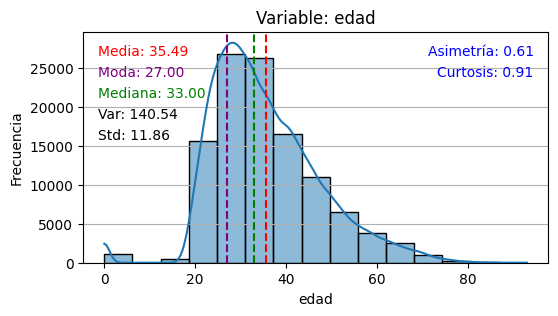

In [275]:
plot_histograma(df_sneep_no_ids_csv, 'edad', mvd= True, snk=True)

In [274]:
media, moda, mediana, min, max, var, std, skewness, kurtosis = get_metrics_from_numeric_column(df_sneep_no_ids_csv, 'edad')

print(f"""Variable Edad
      Media:      {media:.2f}
      Moda:       {moda:.2f}
      Mediana:    {mediana:.2f}
      Mínimo:     {min:.2f}
      Máximo:     {max:.2f}
      Varianza:   {var:.2f}
      Desvío:     {std:.2f}
      Skewness:   {skewness:.2f}
      Kurtosis:   {kurtosis:.2f}
""")

Variable Edad
      Media:      35.49
      Moda:       27.00
      Mediana:    33.00
      Mínimo:     0.00
      Máximo:     93.00
      Varianza:   140.54
      Desvío:     11.86
      Skewness:   0.61
      Kurtosis:   0.91



#### Paso 3.1.2 - Análisis de outliers para la variable `Edad`

En esta sección se realizó un análisis de outliers para la variable `Edad`.

En una primera instancia se realiza el gráfico de Boxplot, en donde se puede observar que hay outliers con las siguientes características:

- Los valores menores al mínimo definido por el rango intercuartil $(Q1-1.5*IQR)$ son todos iguales a cero
- Hay muchos casos mayores al máximo definido por el rango intercuartil $(Q3+1.5*IQR)$

Debido a esto, se calcularo los siguientes valores relacionados al rango intercuartil (IQR):
- *Q1* (25%): 27
- *Q2* (50%): 33
- *Q3* (75%): 42
- *IQR*: 15
- Mín *IQR*: 4.50
- Max *IQR*: 64.50

Además, se calculó la cantidad de registros con edades menores y mayores a los valores que define el IQR:
- Cantidad de registros menores al mínimo definido por el IQR (4.5 años)
  - Cantidad: 1145
  - Valores: todos son iguales a cero
  - Conclusión: se tratan de valores nulos. Hace falta igualmente un análisis de nulos para determinar su tipo.
- Cantidad de registros mayores al máximo definido por el IQR (64.5 años)
  - Cantidad: 2464
  - Valores: de 65 hasta 93 años
  - Conclusión: son datos atípicos, pero parecen ser válidos

De este análisis podemos concluir que los valores de Skewness ($0.61$) y Kurtosis ($0.91$) reflejan correctamente la presencia de *outliers* para la variable `Edad`, ya que se tienen 3600 casos de datos atípicos (1145 son cero, es decir, posibles nulos), de un total de 111967 registros, es decir, un 3% de los datos de `edad` son outliers.

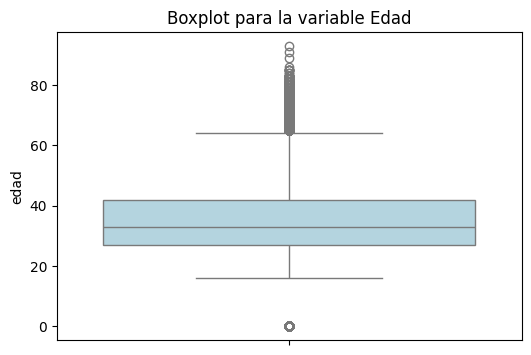

In [335]:
# Boxplot de la variable Edad
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_sneep_no_ids_csv, y='edad', color="lightblue")
plt.title("Boxplot para la variable Edad")
plt.show()

In [284]:
Q1, Q2, Q3, IQR, min_iqr, max_iqr = get_iqr_metrics(df_sneep_no_ids_csv, "edad")

print(f"""Variable Edad
    Q1 (25%):   {Q1:.2f}
    Q2 (50%):   {Q2:.2f}
    Q3 (75%):   {Q3:.2f}
    IQR:        {IQR:.2f}
    Mín IQR:    {min_iqr:.2f}
    Max IQR:    {max_iqr:.2f}
""")

Variable Edad
    Q1 (25%):   27.00
    Q2 (50%):   33.00
    Q3 (75%):   42.00
    IQR:        15.00
    Mín IQR:    4.50
    Max IQR:    64.50



In [331]:
print(f"Cantidad de registros totales: {df_sneep_no_ids_csv['edad'].count()}\n")

Cantidad de registros totales: 111967



In [ ]:
# Creamos un df temporal con los registros cuya edad sea menor al Min IQR (4)
df_temp = df_sneep_no_ids_csv[df_sneep_no_ids_csv["edad"] <= math.floor(min_iqr)]
unique_values = df_temp["edad"].unique().tolist()

# ordenamos de menor a mayor
unique_values.sort()

print(f"Cantidad de registros con edad menor al Min IQR: {df_temp['edad'].count()}\n")

print(f"|\tValor único\t|\tCantidad\t|")

for val in unique_values:
    cantidad = df_temp[df_temp["edad"] == val]["edad"].count()
    print(f"|\t{val}\t|\t{cantidad}\t|")

Cantidad de registros con edad menor al Min IQR: 1145

|	Valor único	|	Cantidad	|
|	0	|	1145	|


In [ ]:
# Creamos un df temporal con los registros cuya edad sea mayor al Máx IQR (64)
df_temp = df_sneep_no_ids_csv[df_sneep_no_ids_csv["edad"] > math.floor(max_iqr)]
unique_values = df_temp["edad"].unique().tolist()

# ordenamos de menor a mayor
unique_values.sort()

print(f"Cantidad de registros con edad mayor al Max IQR: {df_temp['edad'].count()}\n")

print(f"| Valor único\t| Cantidad\t|")

for val in unique_values:
    cantidad = df_temp[df_temp["edad"] == val]["edad"].count()
    print(f"|\t{val}\t|\t{cantidad}\t|")


Cantidad de registros con edad mayor al Max IQR: 2464

| Valor único	| Cantidad	|
|	65	|	358	|
|	66	|	310	|
|	67	|	292	|
|	68	|	244	|
|	69	|	248	|
|	70	|	220	|
|	71	|	162	|
|	72	|	136	|
|	73	|	100	|
|	74	|	97	|
|	75	|	64	|
|	76	|	66	|
|	77	|	48	|
|	78	|	31	|
|	79	|	26	|
|	80	|	17	|
|	81	|	14	|
|	82	|	9	|
|	83	|	10	|
|	84	|	2	|
|	85	|	6	|
|	86	|	1	|
|	89	|	1	|
|	91	|	1	|
|	93	|	1	|


### Paso 3.2 - Exploración de la variable `duracion_condena_anios`

A continuación, se detallan algunas métricas relacionadas a la variable `Duración condena años`:

| Métrica | Valor |
| --- | --- |
| Media     | 4.2  |
| Moda      | 0  |
| Mediana   | 3  |
| Mínimo    | 0.00   |
| Máximo    | 52  |
| Varianza  | 130.52 |
| Desvío    | 5.52  |
| Skewness  | 1.82   |
| Kurtosis  | 4.82   |

En la tabla anterior tenemos algunos valores que valen la pena analizar:

- Mínimo: el valor mínimo para `Duración condena años` es de cero. Esto podría deberse a que la persona en cuestión no haya recibido condena, o que la condena sea menor a un año.
- Máximo: el valor máximo para `Duración condena años` es de 52 años.
- Skewness
    - En nuestro caso, obtuvimos un valor de $1.82$.
    - Como el valor es mayor a 1, podemos decir que es altamente asimétrica.
    - Esto último podría deberse a la presencia de valores atípicos grandes, por lo cual vale la pena hacer un análisis de outliers.
- Kurtosis
    - En nuestro caso, obtuvimos un valor de $4.82$.
    - Un valor *mayor a cero* podría deberse a la presencia de outliers (*Leptocúrtico*). Entonces, vale la pena hacer un análisis de outliers para esta variable.

#### Paso 3.2.1 - Obtención de métricas para la variable `duracion_condena_anios`

En esta sección se puede encontrar el gráfico del histograma de la variable `Duración condena años`, en donde se detallan:

- Media ($4.2$)
- Moda ($0$)
- Mediana ($3$)
- Varianza ($130.52$)
- Desvío Estándar ($5.52$)
- Skewness o asimetría ($1.82$)
- Kurtosis ($4.82$)

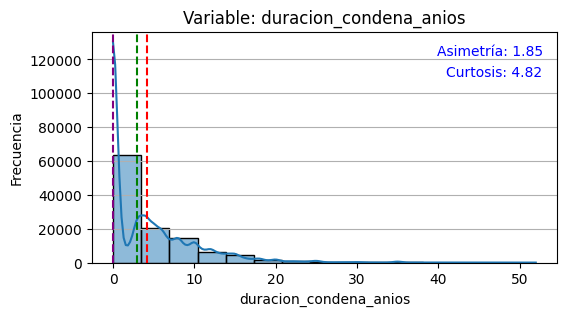

In [340]:
plot_histograma(df_sneep_no_ids_csv, 'duracion_condena_anios', mvd= False, snk=True)

In [342]:
media, moda, mediana, min, max, var, std, skewness, kurtosis = get_metrics_from_numeric_column(df_sneep_no_ids_csv, 'duracion_condena_anios')

print(f"""Variable Duración condena años
      Media:      {media:.2f}
      Moda:       {moda:.2f}
      Mediana:    {mediana:.2f}
      Mínimo:     {min:.2f}
      Máximo:     {max:.2f}
      Varianza:   {var:.2f}
      Desvío:     {std:.2f}
      Skewness:   {skewness:.2f}
      Kurtosis:   {kurtosis:.2f}
""")

Variable Duración condena años
      Media:      4.20
      Moda:       0.00
      Mediana:    3.00
      Mínimo:     0.00
      Máximo:     52.00
      Varianza:   30.52
      Desvío:     5.52
      Skewness:   1.85
      Kurtosis:   4.82



#### Paso 3.2.2 - Análisis de outliers para la variable `duracion_condena_anios`

En esta sección se realizó un análisis de outliers para la variable `duracion_condena_anios`.

En una primera instancia se realiza el gráfico de Boxplot, en donde se puede observar que hay outliers con las siguientes características:

- Hay muchos casos mayores al máximo definido por el rango intercuartil $(Q3+1.5*IQR)$

Debido a esto, se calcularo los siguientes valores relacionados al rango intercuartil (IQR):
- *Q1* (25%): 0
- *Q2* (50%): 3
- *Q3* (75%): 7
- *IQR*: 7
- Mín *IQR*: 0 (la cuenta da -10.5, pero carece de sentido al analizar años)
- Max *IQR*: 17.5

Además, se calculó la cantidad de registros con edades menores o iguales y mayores a los valores que define el IQR:
- Cantidad de registros menores o iguales al mínimo definido por el IQR (0 años)
  - Cantidad: 50324
  - Valores: todos son iguales a cero
  - Conclusión: en este caso se trata en su mayoría de registros cuyo valor de `situacion_legal_descripcion` no es `Condenado/a`, por lo cual, tiene sentido que la condena sea igual a cero. En total hay 44615 `no condenados/as`. Si bien estos datos son correctos, habría que ver si conviene tratarlos de otra forma, ya que no representan lo mismo que aquellos cuyo valor es `Condenado/a` y recibieron condena menor a 1 año. Además, existen un total de 5709 registros correspondientes a `Condenado/a` cuya condena en años es cero, pero esto puede deberse a que `duracion_condena_meses` o `duracion_condena_rango` sean distintas de cero, y correspondan a menos de un año.
- Cantidad de registros mayores al máximo definido por el IQR (64.5 años)
  - Cantidad: 3394
  - Valores: de 18 hasta 52 años
  - Conclusión: son datos atípicos, pero parecen ser válidos

De este análisis podemos concluir que los valores de Skewness ($1.82$) y Kurtosis ($4.82$) reflejan correctamente la presencia de *outliers* para la variable `duracion_condena_anios`:
- Respecto al Skewness, hay que considerar que tenemos 48705 registros con valores mayores a la mediana o Q2 (3 años), es decir, el 43.49% del total de registros (que son 111967).
- Respecto a la kurtosis, estamos ante un caso de distribución *leptocúrtica*. El motivo puede deberse a la cantidad de registros mayores al Máximo definido por el IQR (17.5), siendo 3394 o el 3.03% de los registros totales (total = 111967). En cuanto al valor alto de kurtosis (4.82), este también podría deberse a la asimetría presente en esta distribución.

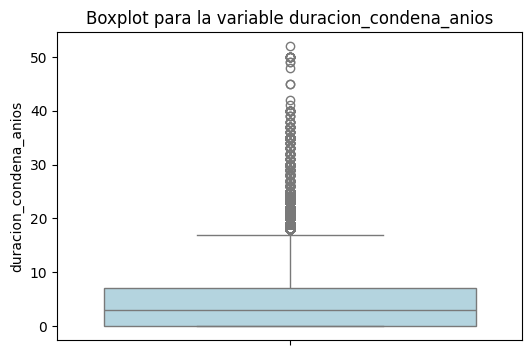

In [ ]:
# Boxplot de la variable duracion_condena_anios
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_sneep_no_ids_csv, y='duracion_condena_anios', color="lightblue")
plt.title("Boxplot para la variable duracion_condena_anios")
plt.show()

In [369]:
print(f"Cantidad de registros totales: {df_sneep_no_ids_csv['duracion_condena_anios'].count()}\n")

Cantidad de registros totales: 111967



In [345]:
Q1, Q2, Q3, IQR, min_iqr, max_iqr = get_iqr_metrics(df_sneep_no_ids_csv, "duracion_condena_anios")

print(f"""Variable duracion_condena_anios
    Q1 (25%):   {Q1:.2f}
    Q2 (50%):   {Q2:.2f}
    Q3 (75%):   {Q3:.2f}
    IQR:        {IQR:.2f}
    Mín IQR:    {min_iqr:.2f}
    Max IQR:    {max_iqr:.2f}
""")

Variable duracion_condena_anios
    Q1 (25%):   0.00
    Q2 (50%):   3.00
    Q3 (75%):   7.00
    IQR:        7.00
    Mín IQR:    -10.50
    Max IQR:    17.50



In [376]:
df_temp = df_sneep_no_ids_csv[df_sneep_no_ids_csv["duracion_condena_anios"] == 0]
situacion_temp = df_temp["situacion_legal_descripcion"].unique().tolist()

print(f"Situacion legal de personas con duracion_condena_anios igual a cero: {situacion_temp}")

df_temp_condenados = df_temp[df_temp["situacion_legal_descripcion"] == 'Condenado/a']
df_temp_no_condenados = df_temp[df_temp["situacion_legal_descripcion"] != 'Condenado/a']

print(f"Cantidad de registros con duracion_condena_anios igual a cero años: {df_temp['duracion_condena_anios'].count()}")
print(f"Cantidad de condenados con duracion_condena_anios igual a cero años: {df_temp_condenados['duracion_condena_anios'].count()}")
print(f"Cantidad de no condenados: {df_temp_no_condenados['duracion_condena_anios'].count()}")

Situacion legal de personas con duracion_condena_anios igual a cero: ['Condenado/a', 'Procesado/a', 'Inimputable', 'Otra situación']
Cantidad de registros con duracion_condena_anios igual a cero años: 50324
Cantidad de condenados con duracion_condena_anios igual a cero años: 5709
Cantidad de no condenados: 44615


In [380]:
# Creamos un df temporal con los registros cuya edad sea mayor al Q2 o Mediana (3)
df_temp = df_sneep_no_ids_csv[df_sneep_no_ids_csv["duracion_condena_anios"] > math.floor(Q2)]
unique_values = df_temp["duracion_condena_anios"].unique().tolist()

# ordenamos de menor a mayor
unique_values.sort()

print(f"Cantidad de registros con duracion_condena_anios mayor al Q2: {df_temp['duracion_condena_anios'].count()}\n")

Cantidad de registros con duracion_condena_anios mayor al Q2: 48705



In [381]:
# Creamos un df temporal con los registros cuya edad sea mayor al Q3 (7)
df_temp = df_sneep_no_ids_csv[df_sneep_no_ids_csv["duracion_condena_anios"] > math.floor(Q3)]
unique_values = df_temp["duracion_condena_anios"].unique().tolist()

# ordenamos de menor a mayor
unique_values.sort()

print(f"Cantidad de registros con duracion_condena_anios mayor al Q3: {df_temp['duracion_condena_anios'].count()}\n")

Cantidad de registros con duracion_condena_anios mayor al Q3: 24832



In [ ]:
# Creamos un df temporal con los registros cuya edad sea mayor al Máx IQR (17.50)
df_temp = df_sneep_no_ids_csv[df_sneep_no_ids_csv["duracion_condena_anios"] > math.floor(max_iqr)]
unique_values = df_temp["duracion_condena_anios"].unique().tolist()

# ordenamos de menor a mayor
unique_values.sort()

print(f"Cantidad de registros con duracion_condena_anios mayor al Max IQR: {df_temp['duracion_condena_anios'].count()}\n")

print(f"| Valor único\t| Cantidad\t|")

for val in unique_values:
    cantidad = df_temp[df_temp["duracion_condena_anios"] == val]["duracion_condena_anios"].count()
    print(f"|\t{val}\t|\t{cantidad}\t|")


Cantidad de registros con duracion_condena_anios mayor al Max IQR: 3394

| Valor único	| Cantidad	|
|	18	|	758	|
|	19	|	293	|
|	20	|	616	|
|	21	|	165	|
|	22	|	235	|
|	23	|	174	|
|	24	|	158	|
|	25	|	357	|
|	26	|	51	|
|	27	|	47	|
|	28	|	55	|
|	29	|	37	|
|	30	|	99	|
|	31	|	12	|
|	32	|	27	|
|	33	|	16	|
|	34	|	9	|
|	35	|	215	|
|	36	|	8	|
|	37	|	17	|
|	38	|	6	|
|	39	|	3	|
|	40	|	18	|
|	41	|	1	|
|	42	|	1	|
|	45	|	2	|
|	48	|	1	|
|	49	|	2	|
|	50	|	10	|
|	52	|	1	|


### Paso 3.3 - Exploración de la variable `duracion_condena_meses`

A continuación, se detallan algunas métricas relacionadas a la variable `Duración condena meses`:

| Métrica | Valor |
| --- | --- |
| Media     | 1.33  |
| Moda      | 0  |
| Mediana   | 0  |
| Mínimo    | 0   |
| Máximo    | 48  |
| Varianza  | 8.42 |
| Desvío    | 2.90  |
| Skewness  | 2.98   |
| Kurtosis  | 17.20   |

En la tabla anterior tenemos algunos valores que valen la pena analizar:

- Mínimo: el valor mínimo para `Duración condena meses` es de cero. Esto podría deberse a que la persona en cuestión no haya recibido condena, o a que la condena se haya expresado solamente en años.
- Máximo: el valor máximo para `Duración condena meses` es de 48 meses.
- Skewness
    - En nuestro caso, obtuvimos un valor de $2.98$.
    - Como el valor es mayor a 1, podemos decir que es altamente asimétrica.
    - Esto último podría deberse a la presencia de valores atípicos grandes, por lo cual vale la pena hacer un análisis de outliers.
- Kurtosis
    - En nuestro caso, obtuvimos un valor de $17.20$.
    - Un valor *mayor a cero* podría deberse a la presencia de outliers (*Leptocúrtico*). Entonces, vale la pena hacer un análisis de outliers para esta variable.

#### Paso 3.3.1 - Obtención de métricas para la variable `duracion_condena_meses`

En esta sección se puede encontrar el gráfico del histograma de la variable `Duración condena meses`, en donde se detallan:

- Media ($1.33$)
- Moda ($0$)
- Mediana ($0$)
- Varianza ($8.42$)
- Desvío Estándar ($2.90$)
- Skewness o asimetría ($2.98$)
- Kurtosis ($17.20$)

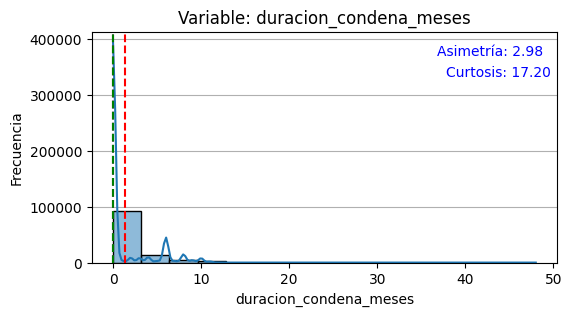

In [384]:
plot_histograma(df_sneep_no_ids_csv, 'duracion_condena_meses', mvd= False, snk=True)

In [385]:
media, moda, mediana, min, max, var, std, skewness, kurtosis = get_metrics_from_numeric_column(df_sneep_no_ids_csv, 'duracion_condena_meses')

print(f"""Variable duracion_condena_meses
      Media:      {media:.2f}
      Moda:       {moda:.2f}
      Mediana:    {mediana:.2f}
      Mínimo:     {min:.2f}
      Máximo:     {max:.2f}
      Varianza:   {var:.2f}
      Desvío:     {std:.2f}
      Skewness:   {skewness:.2f}
      Kurtosis:   {kurtosis:.2f}
""")

Variable duracion_condena_meses
      Media:      1.33
      Moda:       0.00
      Mediana:    0.00
      Mínimo:     0.00
      Máximo:     48.00
      Varianza:   8.42
      Desvío:     2.90
      Skewness:   2.98
      Kurtosis:   17.20



#### Paso 3.3.2 - Análisis de outliers para la variable `duracion_condena_meses`

En esta sección se realizó un análisis de outliers para la variable `duracion_condena_meses`.

En una primera instancia se realiza el gráfico de Boxplot, en donde se puede observar que la mayoría de los registros corresponden a outliers

Debido a esto, se calcularo los siguientes valores relacionados al rango intercuartil (IQR):
- *Q1* (25%): 0
- *Q2* (50%): 0
- *Q3* (75%): 0
- *IQR*: 0
- Mín *IQR*: 0
- Max *IQR*: 0

Como se puede observar, todos los valores relacionados al rango intercuartil (IQR) son cero. Al hacer un análisis más detallado, se encontró que hay 87374 registros con valor de `duracion_condena_meses` igual a cero meses, es decir, el 78.035% de los datos (de un total de 111967 registros).

Analizando como se distribuyen estos valores en función de la variable `situacion_legal_descripcion`, encontramos lo siguiente:
- Hay un total de 42759 registros con `situacion_legal_descripcion` igual a `Condenado/a` que tienene el valor de `duracion_condena_meses` igual a cero meses. Estos serían datos correctos.
- Hay un total de 44615 registros con `situacion_legal_descripcion` ***distintos*** a `Condenado/a` que tienene el valor de `duracion_condena_meses` igual a cero meses. Si bien estos datos son correctos, habría que ver si conviene tratarlos de otra forma, ya que no representan lo mismo.

El análisis del por qué se tienen 44615 registros potencialmente con valores nulos se hará en secciones posteriores.

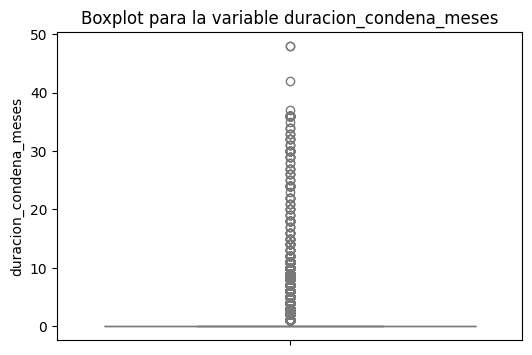

In [387]:
# Boxplot de la variable duracion_condena_meses
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_sneep_no_ids_csv, y='duracion_condena_meses', color="lightblue")
plt.title("Boxplot para la variable duracion_condena_meses")
plt.show()

In [388]:
print(f"Cantidad de registros totales: {df_sneep_no_ids_csv['duracion_condena_meses'].count()}\n")

Cantidad de registros totales: 111967



In [389]:
Q1, Q2, Q3, IQR, min_iqr, max_iqr = get_iqr_metrics(df_sneep_no_ids_csv, "duracion_condena_meses")

print(f"""Variable duracion_condena_meses
    Q1 (25%):   {Q1:.2f}
    Q2 (50%):   {Q2:.2f}
    Q3 (75%):   {Q3:.2f}
    IQR:        {IQR:.2f}
    Mín IQR:    {min_iqr:.2f}
    Max IQR:    {max_iqr:.2f}
""")

Variable duracion_condena_meses
    Q1 (25%):   0.00
    Q2 (50%):   0.00
    Q3 (75%):   0.00
    IQR:        0.00
    Mín IQR:    0.00
    Max IQR:    0.00



In [ ]:
# Cantidad de registros con duracion_condena_meses igual a cero meses
df_sneep_no_ids_csv[df_sneep_no_ids_csv["duracion_condena_meses"] == 0]["duracion_condena_meses"].count()

87374

In [401]:
df_temp = df_sneep_no_ids_csv[df_sneep_no_ids_csv["duracion_condena_meses"] == 0]
situacion_temp = df_temp["situacion_legal_descripcion"].unique().tolist()

print(f"Situacion legal de personas con duracion_condena_meses igual a cero: {situacion_temp}")

df_temp_condenados = df_temp[df_temp["situacion_legal_descripcion"] == 'Condenado/a']
df_temp_no_condenados = df_temp[df_temp["situacion_legal_descripcion"] != 'Condenado/a']

print(f"Cantidad de registros con duracion_condena_meses igual a cero años: {df_temp['duracion_condena_meses'].count()}")
print(f"Cantidad de condenados con duracion_condena_meses igual a cero años: {df_temp_condenados['duracion_condena_meses'].count()}")
print(f"Cantidad de no condenados: {df_temp_no_condenados['duracion_condena_meses'].count()}")

Situacion legal de personas con duracion_condena_meses igual a cero: ['Condenado/a', 'Procesado/a', 'Inimputable', 'Otra situación']
Cantidad de registros con duracion_condena_meses igual a cero años: 87374
Cantidad de condenados con duracion_condena_meses igual a cero años: 42759
Cantidad de no condenados: 44615


### Paso 3.4 - Exploración de la variable `duracion_condena_rango`

A continuación, se detallan algunas métricas relacionadas a la variable `Duración condena rango`:

| Métrica | Valor |
| --- | --- |
| Media     | 1.83  |
| Moda      | 0  |
| Mediana   | 1  |
| Mínimo    | 0  |
| Máximo    | 8  |
| Varianza  | 4.32 |
| Desvío    | 2.08  |
| Skewness  | 1.14   |
| Kurtosis  | 0.73   |

En la tabla anterior tenemos algunos valores que valen la pena analizar:

- Mínimo: el valor mínimo para `Duración condena años` es de cero.
- Máximo: el valor máximo para `Duración condena años` es de 8.
- Debido a los valores mínimos y máximos se cree que estamos ante una variable categórica expresada mediante números. Habrá que analizar las fuentes del dataset para determinar a que se refiere cada valor. Se intuye que la variable representa rangos de condena (por ejemplo: el valor 0 corresponde a *Entre 0 y 2 años*), pero se carece de la información necesaria.

#### Paso 3.4.1 - Obtención de métricas para la variable `duracion_condena_rango`

En esta sección se puede encontrar el gráfico del histograma de la variable `Duración condena rango`, en donde se detallan:

- Media ($1.83$)
- Moda ($0$)
- Mediana ($1$)
- Varianza ($4.32$)
- Desvío Estándar ($2.08$)
- Skewness o asimetría ($1.14$)
- Kurtosis ($0.73$)

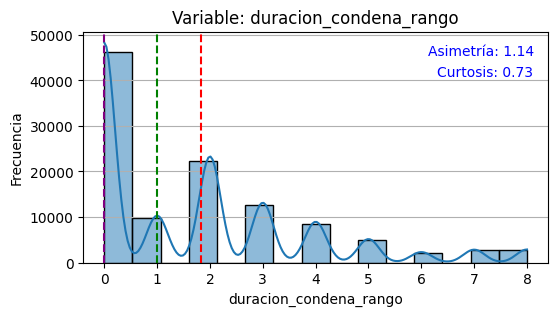

In [403]:
plot_histograma(df_sneep_no_ids_csv, 'duracion_condena_rango', mvd= False, snk=True)

In [404]:
media, moda, mediana, min, max, var, std, skewness, kurtosis = get_metrics_from_numeric_column(df_sneep_no_ids_csv, 'duracion_condena_rango')

print(f"""Variable Duración condena rango
      Media:      {media:.2f}
      Moda:       {moda:.2f}
      Mediana:    {mediana:.2f}
      Mínimo:     {min:.2f}
      Máximo:     {max:.2f}
      Varianza:   {var:.2f}
      Desvío:     {std:.2f}
      Skewness:   {skewness:.2f}
      Kurtosis:   {kurtosis:.2f}
""")

Variable Duración condena rango
      Media:      1.83
      Moda:       0.00
      Mediana:    1.00
      Mínimo:     0.00
      Máximo:     8.00
      Varianza:   4.32
      Desvío:     2.08
      Skewness:   1.14
      Kurtosis:   0.73



### Paso 3.5 - Conclusión del análisis para variables numéricas

Se obtuvieron las siguientes conclusiones al analizar las variables numéricas de nuestro dataset (a excepción de los `ids`):

- edad
    - Distribución moderadamente *asimétrica*
    - Es *leptocúrtica*
    - Presenta 3600 datos atípicos.
    - Entre ellos, 1145 corresponden al valor cero, por lo cual estamos en presencia de nulos.
    - El análisis de estos nulos se hará en futura secciones.
- duracion_condena_anios
    - Altamente *asimétrica*, ya que tiene 48705 registros (43.49% del total) con valores mayores a la mediana o Q2 (3 años).
    - Es *leptocúrtica*
    - Presenta 3394 datos atípicos.
    - Hay un total de 50324 registros con valores iguales a cero.
    - De estos, 44615 corresponden a `no condenados/as`. Si bien estos datos son correctos, habría que ver si conviene tratarlos de otra forma, ya que no representan lo mismo que aquellos cuyo valor es `Condenado/a` y recibieron condena menor a 1 año.
- duracion_condena_meses
    - Altamente *asimétrica*.
    - Es *leptocúrtica*
    - 87374 registros con valor igual a cero meses, es decir, el 78.035%.
    - Entre esos, hay un total de 44615 registros con `situacion_legal_descripcion` ***distintos*** a `Condenado/a` que tienene el valor de `duracion_condena_meses` igual a cero meses. Si bien estos datos son correctos, habría que ver si conviene tratarlos de otra forma, ya que no representan lo mismo que aquellos cuyo valor es `Condenado/a` y sus condenas se expresan solamente en años, sin meses.
- duracion_condena_rango
    - Valores enteros entre 0 y 8.
    - Posiblemente sea una categórica representada mediante números.
    - No se tiene suficiente información respecto a que representa cada valor.

## Paso 4 - Exploración de distribuciones de variables categóricas

### Paso 4.1 - Distribuciones de variables categóricas

A continuación, se explorarán las distribuciones de las siguientes variabels categóricas, cuyos valores resultan de interés:

- genero_descripcion
- nivel_instruccion_descripcion
- ultima_situacion_laboral_descripcion
- situacion_legal_descripcion
- tipo_condena
- es_reincidente_descripcion
- reparticion_descripcion
- tuvo_reduccion_pena_descripcion

#### Paso 4.1.1 - Distribución de variable `genero_descripcion`

La variable `genero_descripcion` se distribuye de la siguiente manera:

| Valor | Cantidad |
| --- | --- |
| Varón                  | 107116 |
| Mujer                  |   4642 |
| Trans Mujer/Travesti   |    173 |
| Trans Varón            |     35 |
| No Binario             |      1 |

Como se puede observar, es una variable altamente desbalanceada, ya que su moda es `Varón`, y representa el $95.67$% de los datos.

Esto también puede observarse al obtener la `Entropía de Shannon` para dicha variable, cuyo valor es $0.187$, de un máximo posible de $2.322$.
Al ser un valor relativamente bajo, indica que hay poca incertidumbre, es decir, se demuestra que hay una categoría (`Varón`) que domina al resto.

Se agregan además gráficos de *histogramas* y de *frecuencias relativas* en donde se puede observar como los valores distintos de `Varón` y `Mujer` son ínfimos en comparación a estos dos.

También se analizó como se distribuye la variable `edad` en función de la variable `genero_descripcion`, obteniendo el siguiente resultado:

| genero_descripcion | Media | Mediana | Valor mínimo | Valor máximo | Cantidad |
| --- | --- | --- | --- | --- | --- |
| Mujer | 36.995907 | 35.0 | 0 | 82 | 4642 |
| No Binario | 30.000000 | 30.0 | 30 | 30 | 1 |
| Trans Mujer/Travesti | 36.745665 | 36.0 | 0 | 59 | 173 |
| Trans Varón | 34.285714 | 33.0 | 21 | 67 | 35 |
| Varón | 35.423625 | 33.0 | 0 | 93 | 107116 |

<br/>

> ***Nota***: Recordar que la variable `edad` presenta datos erróneos con valores iguales a cero, además de ciertos *outliers*.

Por último, se muestra un *boxplot* de `edad` en función de `genero_descripcion`.

In [417]:
# Mostramos como se distribuyen los valores de la variable genero_descripcion, incluyendo NAs
df_sneep_no_ids_csv["genero_descripcion"].value_counts(dropna=False)

genero_descripcion
Varón                   107116
Mujer                     4642
Trans Mujer/Travesti       173
Trans Varón                 35
No Binario                   1
Name: count, dtype: int64

In [422]:
total = df_sneep_no_ids_csv["genero_descripcion"].count()
moda = df_sneep_no_ids_csv["genero_descripcion"].mode()[0]

cant_igual_moda = df_sneep_no_ids_csv[df_sneep_no_ids_csv["genero_descripcion"] == moda]["genero_descripcion"].count()
porcentaje_moda = cant_igual_moda*100/total

print(f"La moda de la variable \'genero_descripcion\' es \'{moda}\', y representa el {porcentaje_moda:.2f}% de los datos (total: {total})")

La moda de la variable 'genero_descripcion' es 'Varón', y representa el 95.67% de los datos (total: 111967)


In [435]:
obtener_entropia_de_shannon(df_sneep_no_ids_csv, "genero_descripcion")

Variable "genero_descripcion"
          Entropía:             0.18696572563901298
          Max entropía posible: 2.321928094887362


(0.18696572563901298, 2.321928094887362)

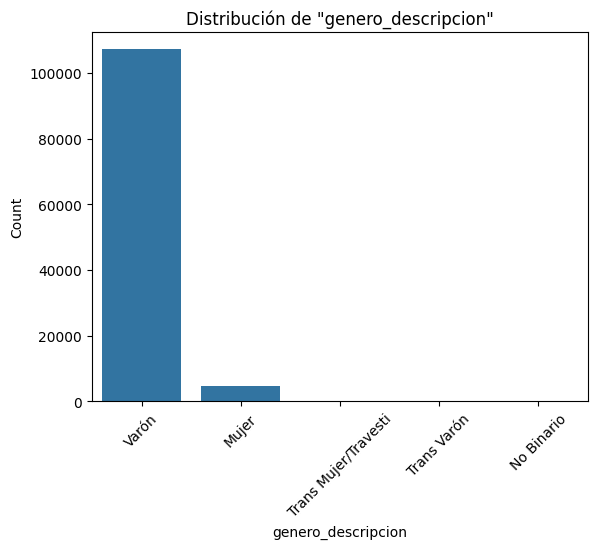

In [ ]:
graficar_distribucion_histograma(data=df_sneep_no_ids_csv, col="genero_descripcion", titulo="Distribución de \"genero_descripcion\"", xlabel="genero_descripcion")

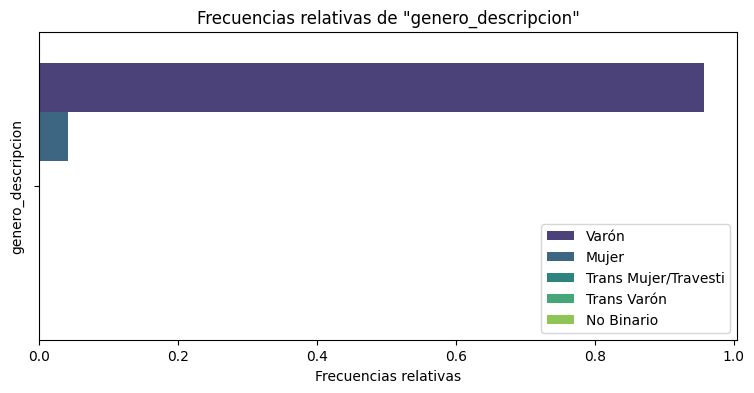

In [440]:
graficar_frecuencias_relativas(data=df_sneep_no_ids_csv, col="genero_descripcion", titulo="Frecuencias relativas de \"genero_descripcion\"", xlabel="Frecuencias relativas", ylabel="genero_descripcion")

In [ ]:
agrupar_por_columnas_info_aggregation(df_sneep_no_ids_csv, ["genero_descripcion"], fn_to_apply=fill_na_as_string_lambda, info_from_col="edad", agg=agg_mean_median_min_max_count)

,Media,Mediana,Valor mínimo,Valor máximo,Cantidad
genero_descripcion,,,,,
Mujer,36.995907,35.0,0,82,4642
No Binario,30.000000,30.0,30,30,1
Trans Mujer/Travesti,36.745665,36.0,0,59,173
Trans Varón,34.285714,33.0,21,67,35
Varón,35.423625,33.0,0,93,107116


> ***Nota***: Recordar que la variable `edad` presenta datos erroneos con valores iguales a cero.

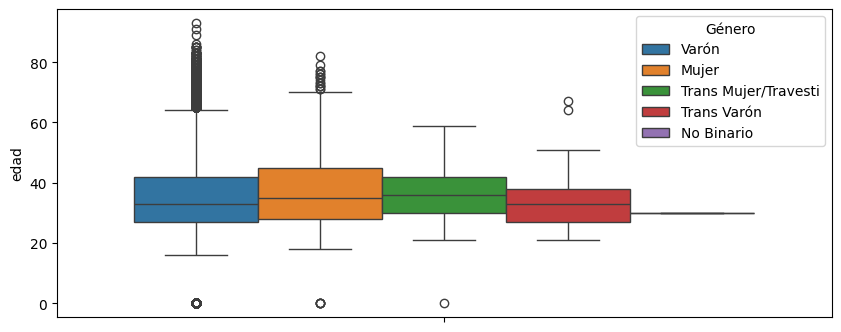

In [447]:
graficar_boxplot(df_sneep_no_ids_csv, col="edad", col_division="genero_descripcion", titulo="Género")

#### Paso 4.1.2 - Distribución de variable `nivel_instruccion_descripcion`

La variable `nivel_instruccion_descripcion` se distribuye de la siguiente manera:

| Valor | Cantidad |
| --- | --- |
| Primario completo        |   33432 |
| Secundario incompleto    |   27572 |
| Primario incompleto      |   23416 |
| Secundario completo      |   11155 |
| NaN                      |    7737 |
| Ninguno                  |    5539 |
| Universitario incompleto |    1202 |
| Terciario completo       |     740 |
| Terciario incompleto     |     626 |
| Universitario completo   |     548 |

La moda de esta variable es `Primario completo`, y representa el $32.08$% de los datos.

En este caso, la `Entropía de Shannon` para dicha variable tiene un valor de $1.592$, de un máximo posible de $3.17$.
Esto refleja que hay ciertos valores que dominan al resto, por ejemplo `Primario completo` (moda), `Secundario incompleto`, `Primario incompleto`, y `Secundario completo`.

Nótese además que esta variable presenta ***datos nulos***, expresados mediante el valor `NaN`.

También se analizó como se distribuye la variable `edad` en función de la variable `nivel_instruccion_descripcion`, obteniendo el siguiente resultado:

| nivel_instruccion_descripcion | Media | Mediana | Valor mínimo | Valor máximo | Cantidad |
| --- | --- | --- | --- | --- | --- |
| N/A | 34.980354 | 33.0 | 0 | 84 | 7737 |
| Ninguno | 38.997292 | 36.0 | 0 | 91 | 5539 |
| Primario completo | 35.551926 | 34.0 | 0 | 89 | 33432 |
| Primario incompleto | 35.730184 | 34.0 | 0 | 93 | 23416 |
| Secundario completo | 37.116898 | 36.0 | 0 | 85 | 11155 |
| Secundario incompleto | 33.386769 | 31.0 | 0 | 82 | 27572 |
| Terciario completo | 43.152703 | 42.0 | 0 | 85 | 740 |
| Terciario incompleto | 39.142173 | 38.0 | 0 | 79 | 626 |
| Universitario completo | 42.381387 | 40.0 | 0 | 85 | 548 |
| Universitario incompleto | 39.633943 | 38.5 | 0 | 77 | 1202 |


<br/>

> ***Nota***: Recordar que la variable `edad` presenta datos erróneos con valores iguales a cero, además de ciertos *outliers*.

Por último, se muestra un *boxplot* de `edad` en función de `nivel_instruccion_descripcion`.

In [ ]:
df_sneep_no_ids_csv["nivel_instruccion_descripcion"].value_counts(dropna=False)

nivel_instruccion_descripcion
Primario completo           33432
Secundario incompleto       27572
Primario incompleto         23416
Secundario completo         11155
NaN                          7737
Ninguno                      5539
Universitario incompleto     1202
Terciario completo            740
Terciario incompleto          626
Universitario completo        548
Name: count, dtype: int64

In [484]:
total = df_sneep_no_ids_csv["nivel_instruccion_descripcion"].count()
moda = df_sneep_no_ids_csv["nivel_instruccion_descripcion"].mode()[0]

cant_igual_moda = df_sneep_no_ids_csv[df_sneep_no_ids_csv["nivel_instruccion_descripcion"] == moda]["nivel_instruccion_descripcion"].count()
porcentaje_moda = cant_igual_moda*100/total

print(f"La moda de la variable \'nivel_instruccion_descripcion\' es \'{moda}\', y representa el {porcentaje_moda:.2f}% de los datos (total: {total})")

La moda de la variable 'nivel_instruccion_descripcion' es 'Primario completo', y representa el 32.08% de los datos (total: 104230)


In [485]:
obtener_entropia_de_shannon(df_sneep_no_ids_csv, "nivel_instruccion_descripcion")

Variable "nivel_instruccion_descripcion"
          Entropía:             1.591978415737859
          Max entropía posible: 3.169925001442312


(1.591978415737859, 3.169925001442312)

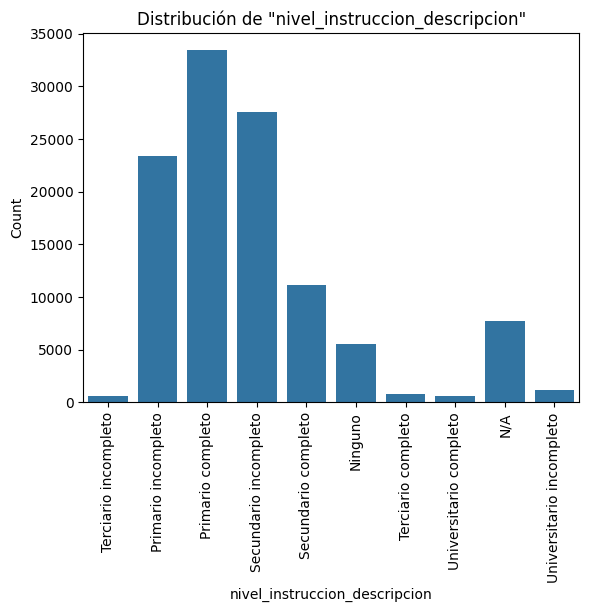

In [501]:
graficar_distribucion_histograma(data=df_sneep_no_ids_csv.fillna("N/A"), col="nivel_instruccion_descripcion", titulo="Distribución de \"nivel_instruccion_descripcion\"", xlabel="nivel_instruccion_descripcion", rotation=90)

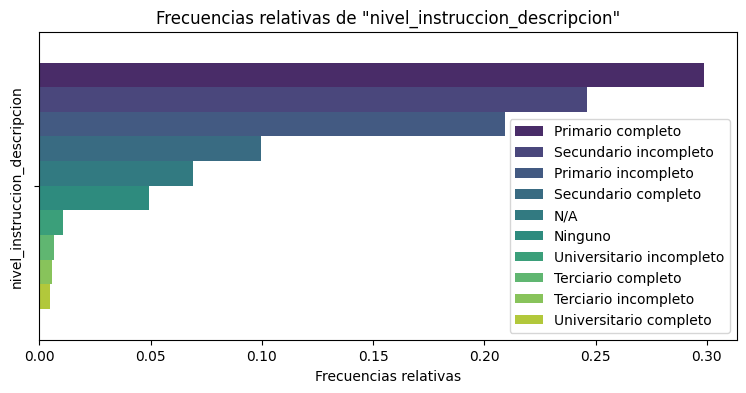

In [503]:
graficar_frecuencias_relativas(data=df_sneep_no_ids_csv.fillna("N/A"), col="nivel_instruccion_descripcion", titulo="Frecuencias relativas de \"nivel_instruccion_descripcion\"", xlabel="Frecuencias relativas", ylabel="nivel_instruccion_descripcion")

In [488]:
agrupar_por_columnas_info_aggregation(df_sneep_no_ids_csv, ["nivel_instruccion_descripcion"], fn_to_apply=fill_na_as_string_lambda, info_from_col="edad", agg=agg_mean_median_min_max_count)

,Media,Mediana,Valor mínimo,Valor máximo,Cantidad
nivel_instruccion_descripcion,,,,,
N/A,34.980354,33.0,0,84,7737
Ninguno,38.997292,36.0,0,91,5539
Primario completo,35.551926,34.0,0,89,33432
Primario incompleto,35.730184,34.0,0,93,23416
Secundario completo,37.116898,36.0,0,85,11155
Secundario incompleto,33.386769,31.0,0,82,27572
Terciario completo,43.152703,42.0,0,85,740
Terciario incompleto,39.142173,38.0,0,79,626
Universitario completo,42.381387,40.0,0,85,548


> ***Nota***: Recordar que la variable `edad` presenta datos erroneos con valores iguales a cero.

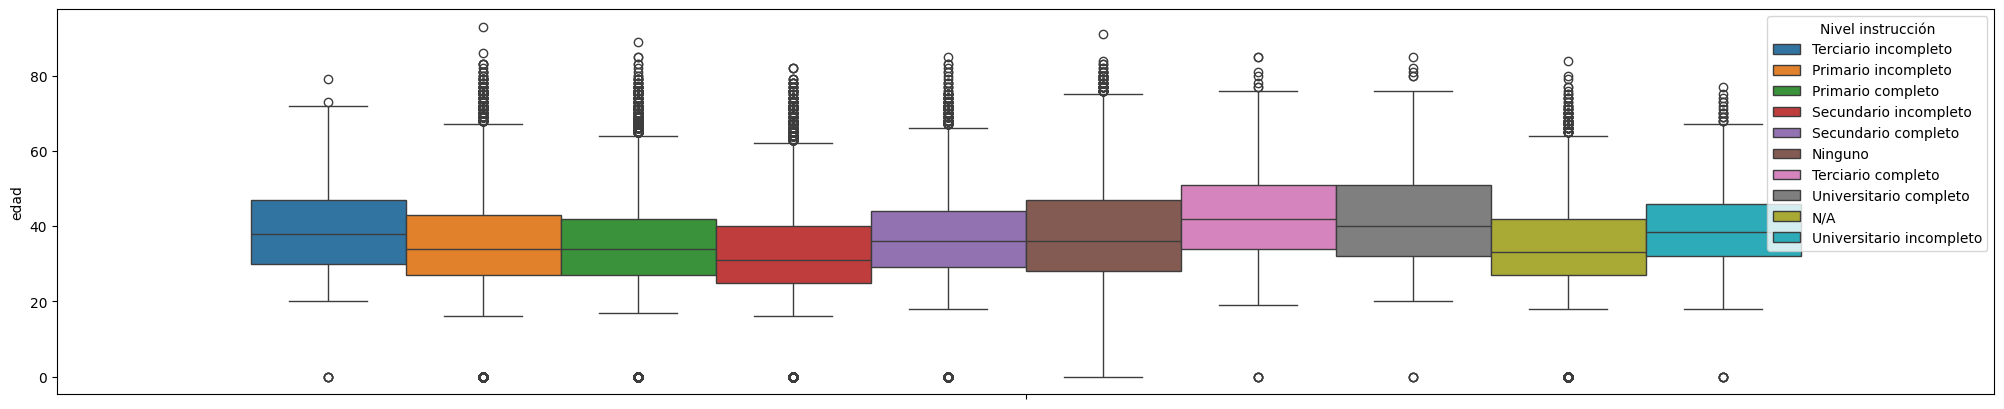

In [500]:
graficar_boxplot(df_sneep_no_ids_csv.apply(fill_na_as_string_lambda), col="edad", col_division="nivel_instruccion_descripcion", titulo="Nivel instrucción", figsize=(25,5))

#### Paso 4.1.3 - Distribución de variable `ultima_situacion_laboral_descripcion`

La variable `ultima_situacion_laboral_descripcion` se distribuye de la siguiente manera:

| Valor | Cantidad |
| --- | --- |
| Trabajador/ra de tiempo parcial   |  40671 |
| Desocupado/a                      |  39958 |
| Trabajador/ra de tiempo completo  |  30449 |
| NaN                               |    889 |

La moda de esta variable es `Trabajador/ra de tiempo parcial`, y representa el $36.61$% de los datos.

En este caso, la `Entropía de Shannon` para dicha variable tiene un valor de $1.09$, de un máximo posible de $1.58$.
Al ser un valor alto de entropía significa que hay mucha incertidumbre, lo cual puede deberse a que las clases están bien distribuídas.

Nótese además que esta variable presenta ***datos nulos***, expresados mediante el valor `NaN`, pero estos son relativamente bajos.

También se analizó como se distribuye la variable `edad` en función de la variable `ultima_situacion_laboral_descripcion`, obteniendo el siguiente resultado:

| ultima_situacion_laboral_descripcion | Media | Mediana | Valor mínimo | Valor máximo | Cantidad |
| --- | --- | --- | --- | --- | --- |
| Desocupado/a | 33.989439 | 32.0 | 0 | 91 | 39958 |
| N/A | 35.449944 | 33.0 | 0 | 76 | 889 |
| Trabajador/ra de tiempo completo | 36.758087 | 35.0 | 0 | 86 | 30449 |
| Trabajador/ra de tiempo parcial | 36.016990 | 34.0 | 0 | 93 | 40671 |

<br/>

> ***Nota***: Recordar que la variable `edad` presenta datos erróneos con valores iguales a cero, además de ciertos *outliers*.

Por último, se muestra un *boxplot* de `edad` en función de `ultima_situacion_laboral_descripcion`.

In [502]:
df_sneep_no_ids_csv["ultima_situacion_laboral_descripcion"].value_counts(dropna=False)

ultima_situacion_laboral_descripcion
Trabajador/ra de tiempo parcial     40671
Desocupado/a                        39958
Trabajador/ra de tiempo completo    30449
NaN                                   889
Name: count, dtype: int64

In [504]:
total = df_sneep_no_ids_csv["ultima_situacion_laboral_descripcion"].count()
moda = df_sneep_no_ids_csv["ultima_situacion_laboral_descripcion"].mode()[0]

cant_igual_moda = df_sneep_no_ids_csv[df_sneep_no_ids_csv["ultima_situacion_laboral_descripcion"] == moda]["ultima_situacion_laboral_descripcion"].count()
porcentaje_moda = cant_igual_moda*100/total

print(f"La moda de la variable \'ultima_situacion_laboral_descripcion\' es \'{moda}\', y representa el {porcentaje_moda:.2f}% de los datos (total: {total})")

La moda de la variable 'ultima_situacion_laboral_descripcion' es 'Trabajador/ra de tiempo parcial', y representa el 36.61% de los datos (total: 111078)


In [505]:
obtener_entropia_de_shannon(df_sneep_no_ids_csv, "ultima_situacion_laboral_descripcion")

Variable "ultima_situacion_laboral_descripcion"
          Entropía:             1.0904278100123772
          Max entropía posible: 1.584962500721156


(1.0904278100123772, 1.584962500721156)

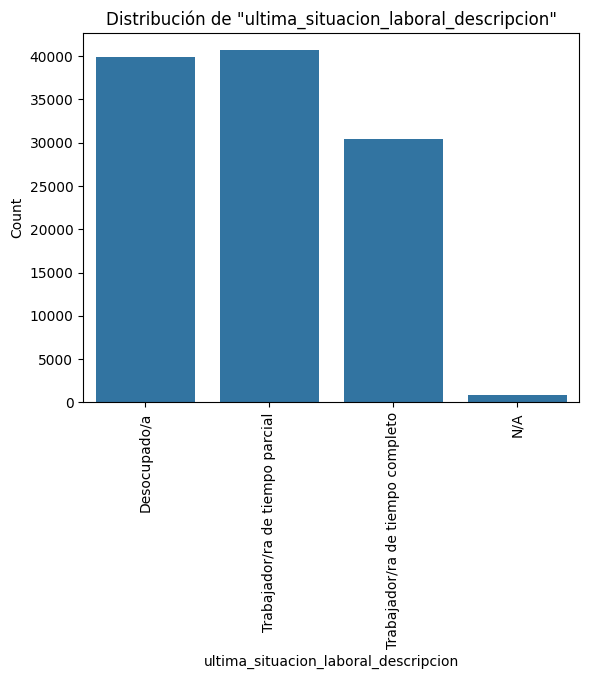

In [506]:
graficar_distribucion_histograma(data=df_sneep_no_ids_csv.fillna("N/A"), col="ultima_situacion_laboral_descripcion", titulo="Distribución de \"ultima_situacion_laboral_descripcion\"", xlabel="ultima_situacion_laboral_descripcion", rotation=90)

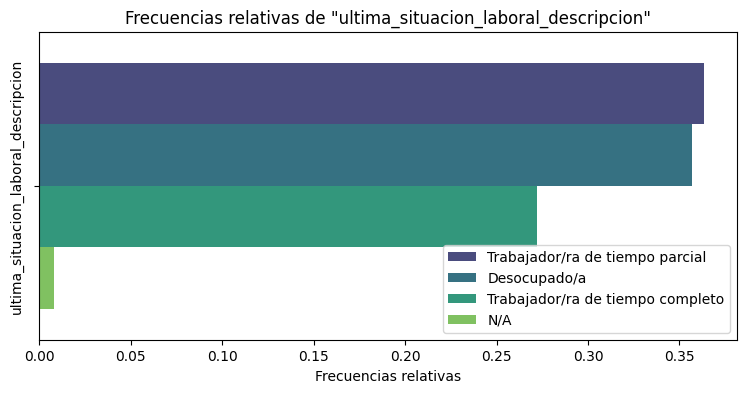

In [507]:
graficar_frecuencias_relativas(data=df_sneep_no_ids_csv.fillna("N/A"), col="ultima_situacion_laboral_descripcion", titulo="Frecuencias relativas de \"ultima_situacion_laboral_descripcion\"", xlabel="Frecuencias relativas", ylabel="ultima_situacion_laboral_descripcion")

In [508]:
agrupar_por_columnas_info_aggregation(df_sneep_no_ids_csv, ["ultima_situacion_laboral_descripcion"], fn_to_apply=fill_na_as_string_lambda, info_from_col="edad", agg=agg_mean_median_min_max_count)

,Media,Mediana,Valor mínimo,Valor máximo,Cantidad
ultima_situacion_laboral_descripcion,,,,,
Desocupado/a,33.989439,32.0,0,91,39958
N/A,35.449944,33.0,0,76,889
Trabajador/ra de tiempo completo,36.758087,35.0,0,86,30449
Trabajador/ra de tiempo parcial,36.016990,34.0,0,93,40671


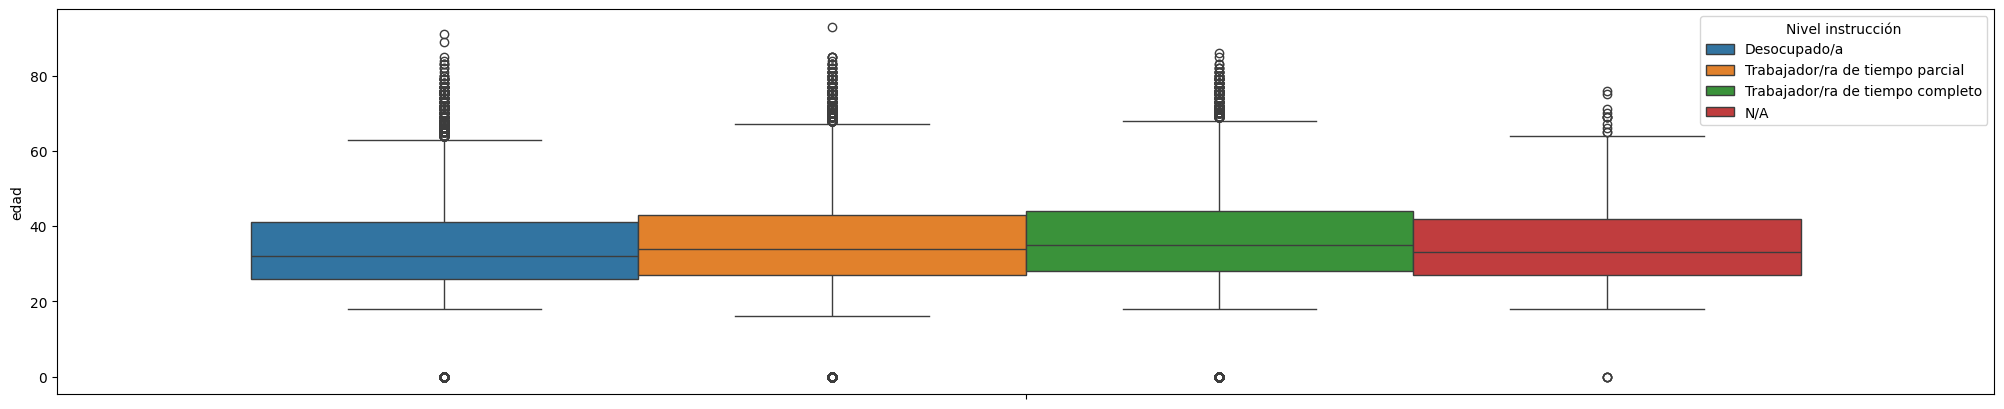

In [513]:
graficar_boxplot(df_sneep_no_ids_csv.apply(fill_na_as_string_lambda), col="edad", col_division="ultima_situacion_laboral_descripcion", titulo="Nivel instrucción", figsize=(25,5))

#### Paso 4.1.4 - Distribución de variable `situacion_legal_descripcion`

La variable `situacion_legal_descripcion` se distribuye de la siguiente manera:

| Valor | Cantidad |
| --- | --- |
| Condenado/a     |  67352 |
| Procesado/a     |  43459 |
| Otra situación  |    864 |
| Inimputable     |    292 |

La moda de esta variable es `Condenado/a`, y representa el $60.15$% de los datos.

En este caso, la `Entropía de Shannon` para dicha variable tiene un valor de $0.73$, de un máximo posible de $2.0$. <br/>
Al ser un valor relativamente bajo de entropía significa que hay poca incertidumbre, lo cual puede deberse a que la clase `Condenado/a` domina al resto.

También se analizó como se distribuye la variable `edad` en función de la variable `situacion_legal_descripcion`, obteniendo el siguiente resultado:

| situacion_legal_descripcion | Media | Mediana | Valor mínimo | Valor máximo | Cantidad |
| --- | --- | --- | --- | --- | --- |
| Condenado/a | 36.119106 | 34.0 | 0 | 93 | 67352 |
| Inimputable | 39.886986 | 37.0 | 0 | 81 | 292 |
| Otra situación | 33.599537 | 32.0 | 0 | 80 | 864 |
| Procesado/a | 34.524218 | 33.0 | 0 | 86 | 43459 |

<br/>

> ***Nota***: Recordar que la variable `edad` presenta datos erróneos con valores iguales a cero, además de ciertos *outliers*.

Por último, se muestra un *boxplot* de `edad` en función de `situacion_legal_descripcion`.

In [526]:
df_sneep_no_ids_csv["situacion_legal_descripcion"].value_counts(dropna=False)

situacion_legal_descripcion
Condenado/a       67352
Procesado/a       43459
Otra situación      864
Inimputable         292
Name: count, dtype: int64

In [518]:
total = df_sneep_no_ids_csv["situacion_legal_descripcion"].count()
moda = df_sneep_no_ids_csv["situacion_legal_descripcion"].mode()[0]

cant_igual_moda = df_sneep_no_ids_csv[df_sneep_no_ids_csv["situacion_legal_descripcion"] == moda]["situacion_legal_descripcion"].count()
porcentaje_moda = cant_igual_moda*100/total

print(f"La moda de la variable \'situacion_legal_descripcion\' es \'{moda}\', y representa el {porcentaje_moda:.2f}% de los datos (total: {total})")

La moda de la variable 'situacion_legal_descripcion' es 'Condenado/a', y representa el 60.15% de los datos (total: 111967)


In [519]:
obtener_entropia_de_shannon(df_sneep_no_ids_csv, "situacion_legal_descripcion")

Variable "situacion_legal_descripcion"
          Entropía:             0.726125597943428
          Max entropía posible: 2.0


(0.726125597943428, 2.0)

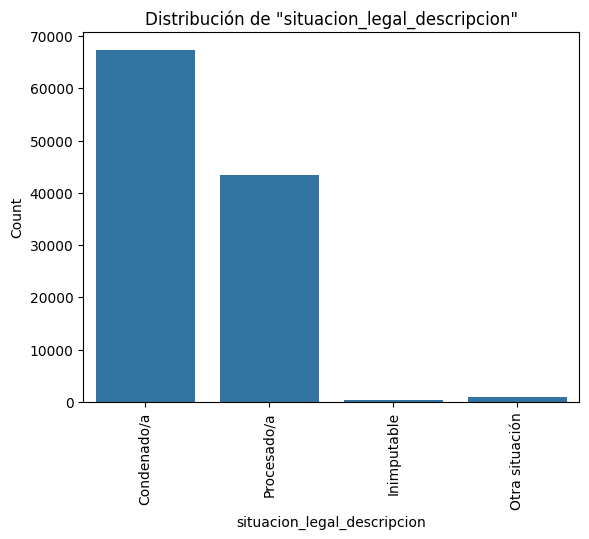

In [520]:
graficar_distribucion_histograma(data=df_sneep_no_ids_csv.fillna("N/A"), col="situacion_legal_descripcion", titulo="Distribución de \"situacion_legal_descripcion\"", xlabel="situacion_legal_descripcion", rotation=90)

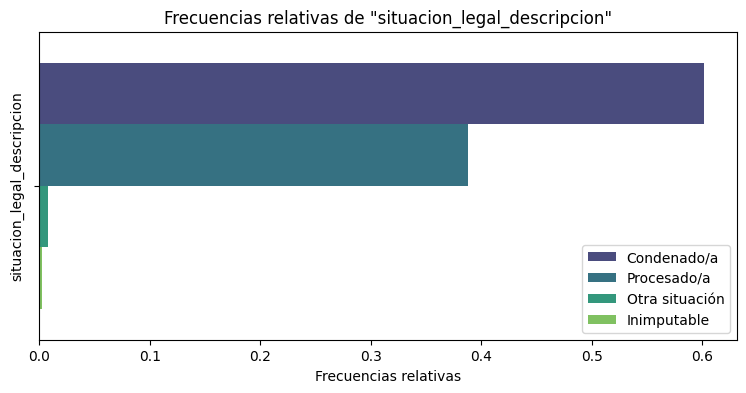

In [521]:
graficar_frecuencias_relativas(data=df_sneep_no_ids_csv.fillna("N/A"), col="situacion_legal_descripcion", titulo="Frecuencias relativas de \"situacion_legal_descripcion\"", xlabel="Frecuencias relativas", ylabel="situacion_legal_descripcion")

In [522]:
agrupar_por_columnas_info_aggregation(df_sneep_no_ids_csv, ["situacion_legal_descripcion"], fn_to_apply=fill_na_as_string_lambda, info_from_col="edad", agg=agg_mean_median_min_max_count)

,Media,Mediana,Valor mínimo,Valor máximo,Cantidad
situacion_legal_descripcion,,,,,
Condenado/a,36.119106,34.0,0,93,67352
Inimputable,39.886986,37.0,0,81,292
Otra situación,33.599537,32.0,0,80,864
Procesado/a,34.524218,33.0,0,86,43459


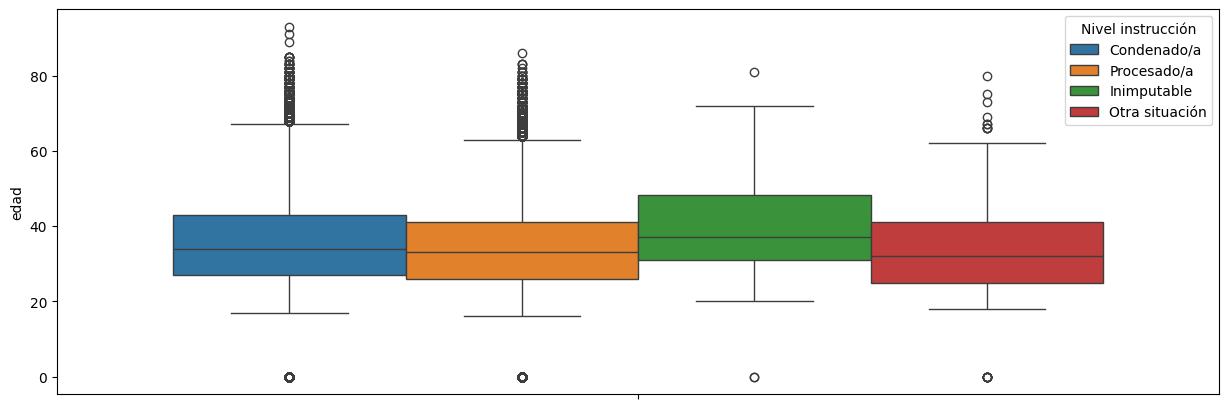

In [525]:
graficar_boxplot(df_sneep_no_ids_csv.apply(fill_na_as_string_lambda), col="edad", col_division="situacion_legal_descripcion", titulo="Nivel instrucción", figsize=(15,5))

## [Ordenar lo siguiente]

### Agrupamiento de variables

In [98]:
# Esta función reemplaza los NA con el string "N/A"
fill_na_as_string_lambda = lambda col: col.fillna("N/A")

In [129]:
df_sneep_no_ids_csv["reparticion_descripcion"].unique()

array(['Provincial', 'Federal', nan], dtype=object)

In [ ]:
# Esta función permite agrupar un dataframe por columnas
# df: Dataframe sobre el cual se trabaja
# cols: columnas sobre las cuales se agruparán
# fn_to_apply: Función a aplicar al dataframe ANTES de agrupar. Puede ser, por ejemplo, para tratar nulos
def agrupar_por_columnas(df, cols = [], fn_to_apply = None):
    if fn_to_apply is not None:
        df = df.apply(fn_to_apply)
    
    if len(cols) > 0:
        df = df.groupby(cols).size()
    return df

In [95]:
agrupar_por_columnas(df_sneep_no_ids_csv, ["tuvo_reduccion_pena_descripcion", "situacion_legal_descripcion"], fill_na_as_string_lambda)

tuvo_reduccion_pena_descripcion  situacion_legal_descripcion
N/A                              Condenado/a                     3660
                                 Inimputable                      292
                                 Otra situación                   864
                                 Procesado/a                    43459
No tuvo reducción de pena        Condenado/a                    60165
Si - Hasta 1 año                 Condenado/a                      254
Si - Hasta 6 meses               Condenado/a                     3087
Si - Mas de 1 año                Condenado/a                      186
dtype: int64

<Axes: title={'center': 'Nro. de vueltas por circuito'}, ylabel='tuvo_reduccion_pena_descripcion,situacion_legal_descripcion'>

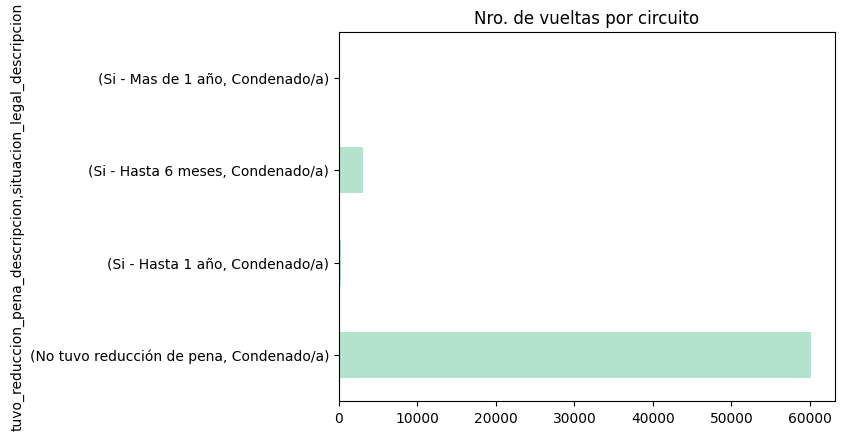

In [446]:
agrupar_por_columnas(df_sneep_no_ids_csv, ["tuvo_reduccion_pena_descripcion", "situacion_legal_descripcion"]).plot(kind='barh', colormap='Pastel2' , title='Nro. de vueltas por circuito')

In [91]:
agrupar_por_columnas(df_sneep_no_ids_csv, ["genero_descripcion", "tuvo_reduccion_pena_descripcion"], fill_na_as_string_lambda)

genero_descripcion    tuvo_reduccion_pena_descripcion
Mujer                 N/A                                 2391
                      No tuvo reducción de pena           1949
                      Si - Hasta 1 año                      18
                      Si - Hasta 6 meses                   275
                      Si - Mas de 1 año                      9
No Binario            No tuvo reducción de pena              1
Trans Mujer/Travesti  N/A                                  102
                      No tuvo reducción de pena             66
                      Si - Hasta 6 meses                     5
Trans Varón           N/A                                   13
                      No tuvo reducción de pena             19
                      Si - Hasta 6 meses                     3
Varón                 N/A                                45769
                      No tuvo reducción de pena          58130
                      Si - Hasta 1 año                     236
 

In [92]:
agrupar_por_columnas(df_sneep_no_ids_csv, ["nacionalidad_descripcion", "tuvo_reduccion_pena_descripcion"], fill_na_as_string_lambda)

nacionalidad_descripcion  tuvo_reduccion_pena_descripcion
Argentina                 N/A                                44362
                          No tuvo reducción de pena          56633
                          Si - Hasta 1 año                     238
                          Si - Hasta 6 meses                  2922
                          Si - Mas de 1 año                    177
Boliviana                 N/A                                  431
                          No tuvo reducción de pena            436
                          Si - Hasta 1 año                       1
                          Si - Hasta 6 meses                    36
                          Si - Mas de 1 año                      1
Brasileña                 N/A                                   42
                          No tuvo reducción de pena             39
                          Si - Hasta 1 año                       1
Chilena                   N/A                                  250
    

### Correlaciones

<Axes: >

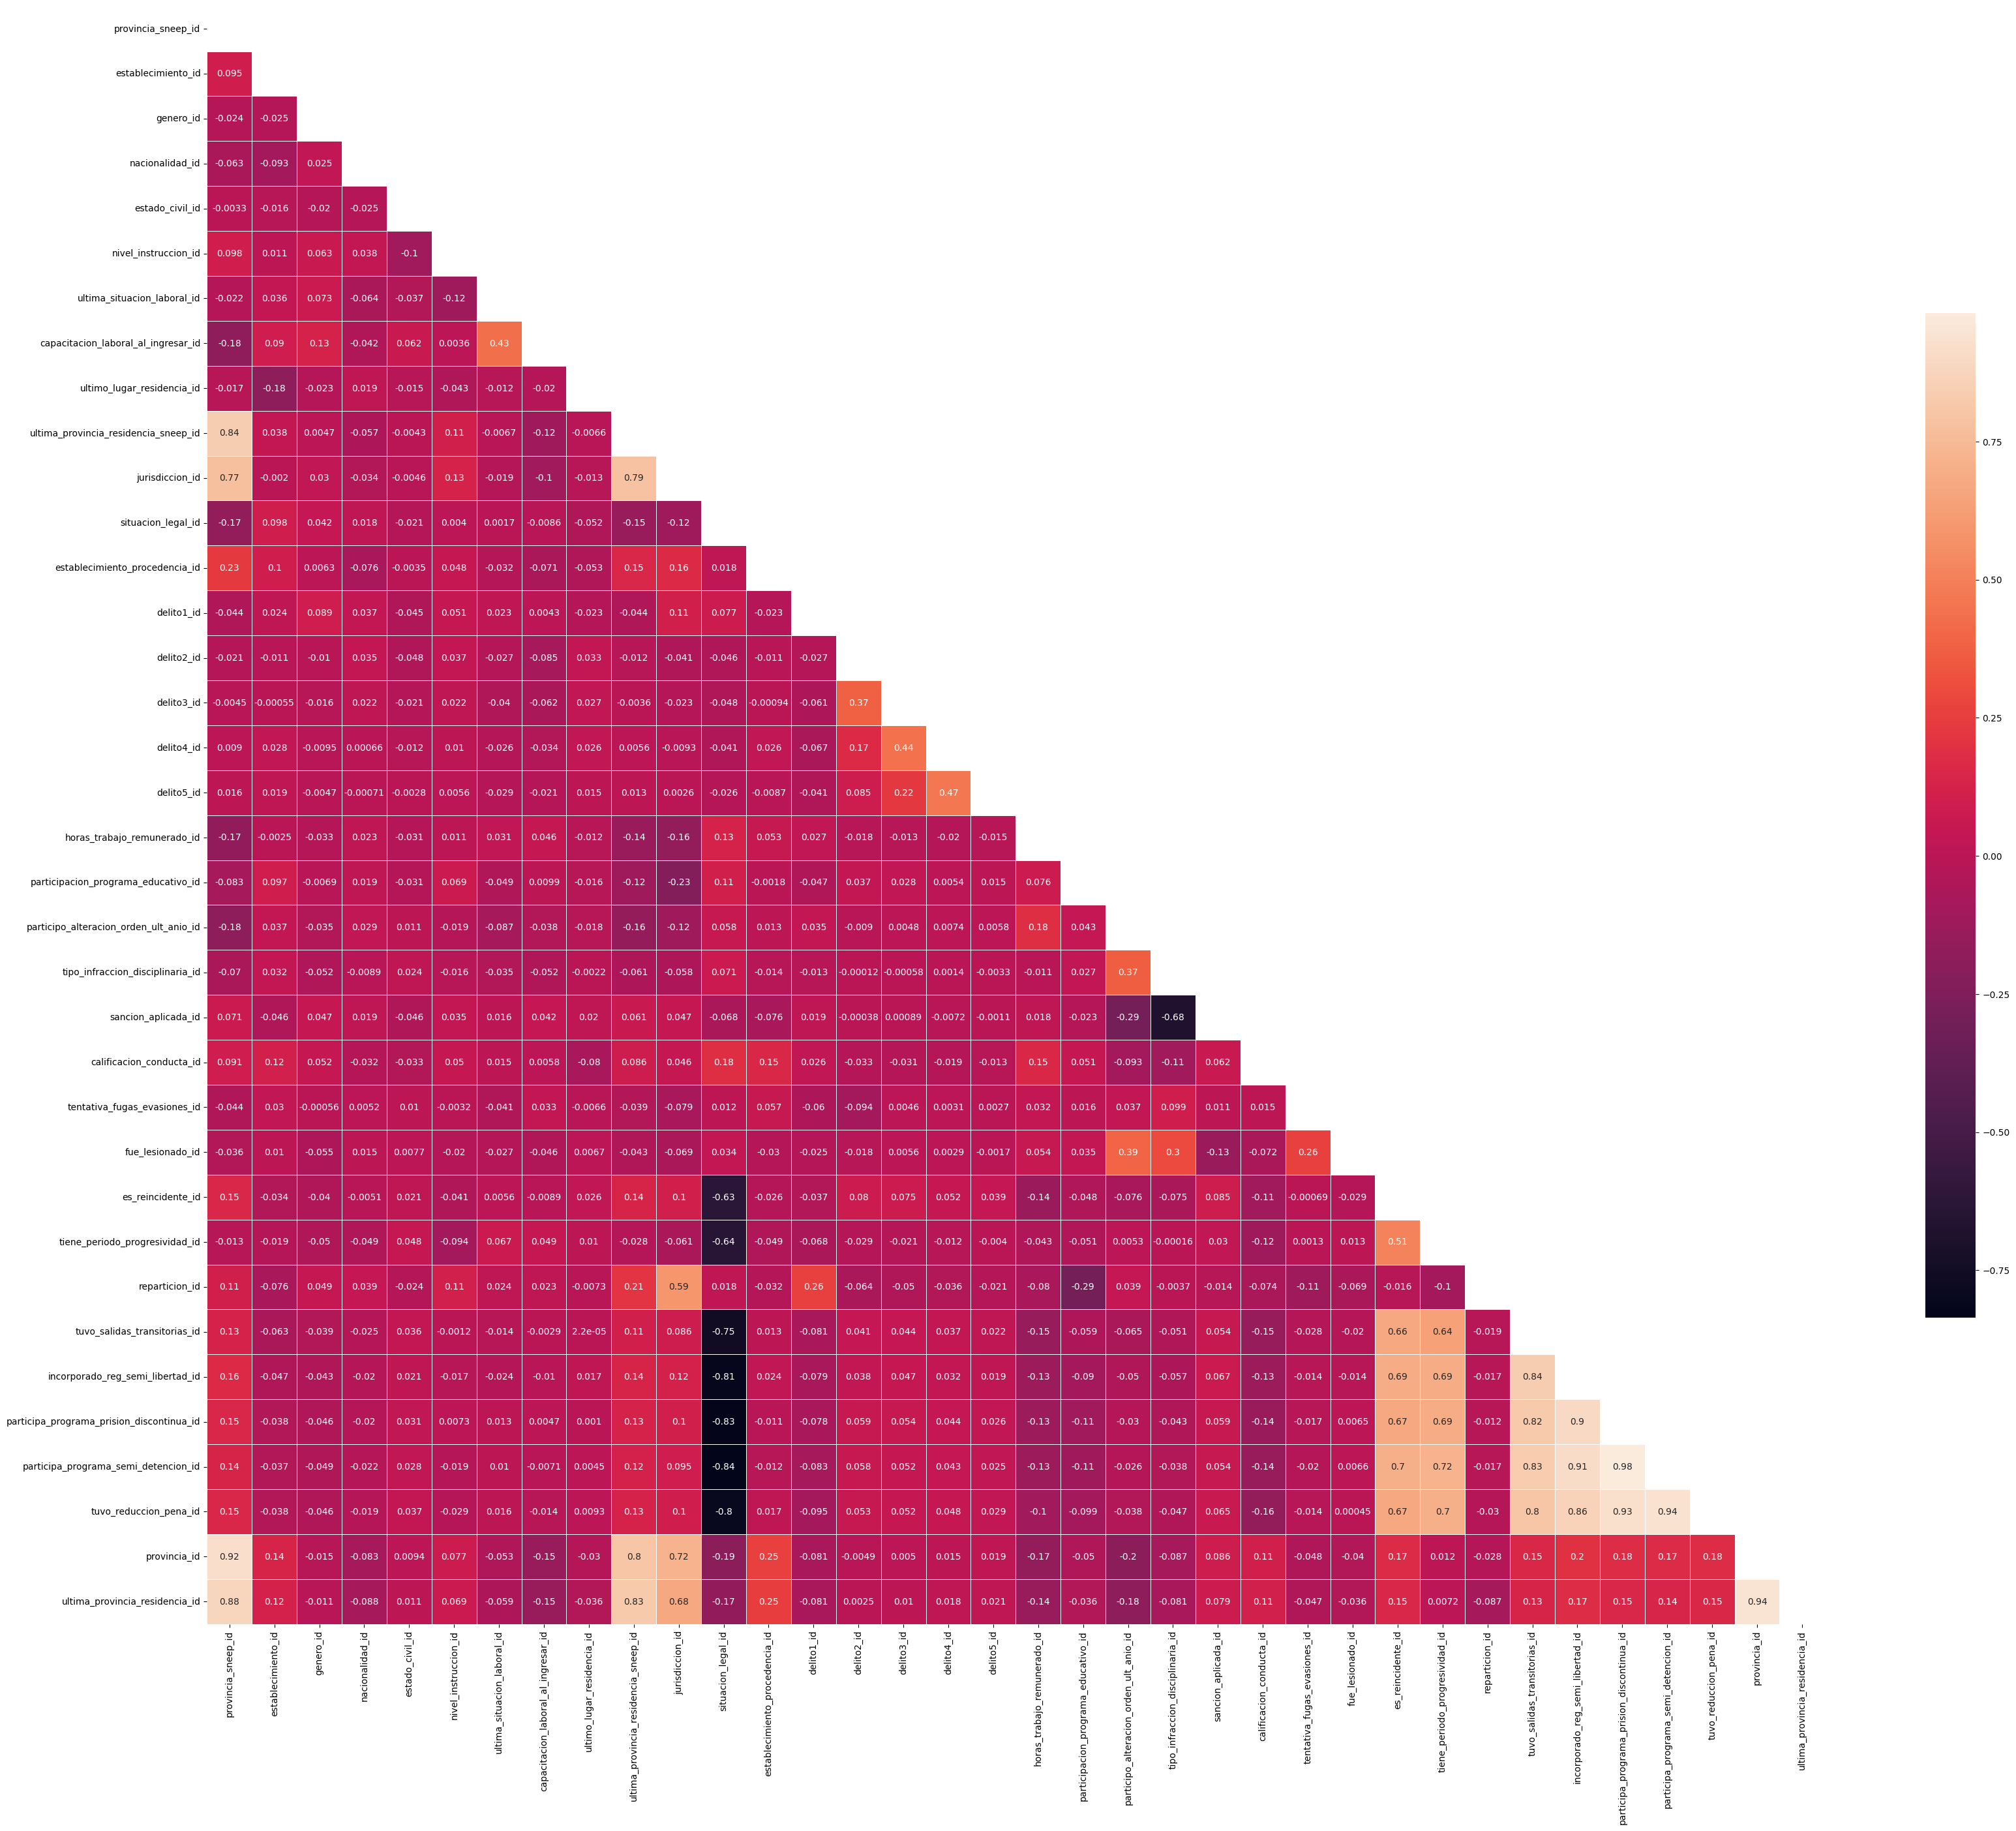

In [131]:
# Fuente: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = df_sneep_solo_ids_csv.corr()

# Se genera una máscara para la parte correspondiente al triángulo superior de la matriz
mask = np.triu(np.ones_like(corr, dtype=bool))

# Tamaño del gráfico de matplotlib
plt.figure(figsize=(40, 40))

sns.heatmap(corr, annot=True, mask=mask, square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Correlación negativa

In [111]:
agrupar_por_columnas(df_sneep_no_ids_csv, ["situacion_legal_descripcion", "tuvo_reduccion_pena_descripcion"], fill_na_as_string_lambda)

situacion_legal_descripcion  tuvo_reduccion_pena_descripcion
Condenado/a                  N/A                                 3660
                             No tuvo reducción de pena          60165
                             Si - Hasta 1 año                     254
                             Si - Hasta 6 meses                  3087
                             Si - Mas de 1 año                    186
Inimputable                  N/A                                  292
Otra situación               N/A                                  864
Procesado/a                  N/A                                43459
dtype: int64

In [113]:
agrupar_por_columnas(df_sneep_no_ids_csv, ["situacion_legal_descripcion", "participa_programa_semi_detencion_descripcion"], fill_na_as_string_lambda)

situacion_legal_descripcion  participa_programa_semi_detencion_descripcion
Condenado/a                  N/A                                               2850
                             No tiene semidetención                           64456
                             Revocada durante el último año                       6
                             Si. Prisión Diurna                                  21
                             Si. Prisión Nocturna                                19
Inimputable                  N/A                                                292
Otra situación               N/A                                                864
Procesado/a                  N/A                                              43459
dtype: int64

In [114]:
agrupar_por_columnas(df_sneep_no_ids_csv, ["situacion_legal_descripcion", "participa_programa_prision_discontinua_descripcion"], fill_na_as_string_lambda)

situacion_legal_descripcion  participa_programa_prision_discontinua_descripcion
Condenado/a                  N/A                                                    3552
                             No está incorporado/a                                 63717
                             Renuncia del interno/a durante el último año              3
                             Revocada durante el último año                            3
                             Si está incorporado/a                                    77
Inimputable                  N/A                                                     292
Otra situación               N/A                                                     864
Procesado/a                  N/A                                                   43459
dtype: int64

In [115]:
agrupar_por_columnas(df_sneep_no_ids_csv, ["situacion_legal_descripcion", "incorporado_reg_semi_libertad_descripcion"], fill_na_as_string_lambda)

situacion_legal_descripcion  incorporado_reg_semi_libertad_descripcion       
Condenado/a                  N/A                                                  1749
                             No está incorporado/a al régimen de semilibertad    64152
                             Revocado durante el último año                        209
                             Si está incorporado/a                                1214
                             Suspendido/a durante el último año                     28
Inimputable                  N/A                                                   292
Otra situación               N/A                                                   864
Procesado/a                  N/A                                                 43459
dtype: int64

#### Correlación positiva

In [116]:
agrupar_por_columnas(df_sneep_no_ids_csv, ["tuvo_salidas_transitorias_descripcion", "tuvo_reduccion_pena_descripcion"], fill_na_as_string_lambda)

tuvo_salidas_transitorias_descripcion  tuvo_reduccion_pena_descripcion
N/A                                    N/A                                45336
                                       No tuvo reducción de pena           2551
                                       Si - Hasta 6 meses                   679
                                       Si - Mas de 1 año                      1
No le fueron otorgadas                 N/A                                 2892
                                       No tuvo reducción de pena          53796
                                       Si - Hasta 1 año                     207
                                       Si - Hasta 6 meses                  2042
                                       Si - Mas de 1 año                    137
Revocadas durante el último año        No tuvo reducción de pena            185
                                       Si - Hasta 6 meses                     3
Si - goza de salidas transitorias      N/A       

In [117]:
agrupar_por_columnas(df_sneep_no_ids_csv, ["incorporado_reg_semi_libertad_descripcion", "tuvo_reduccion_pena_descripcion"], fill_na_as_string_lambda)

incorporado_reg_semi_libertad_descripcion         tuvo_reduccion_pena_descripcion
N/A                                               N/A                                45598
                                                  No tuvo reducción de pena            760
                                                  Si - Hasta 6 meses                     6
No está incorporado/a al régimen de semilibertad  N/A                                 2653
                                                  No tuvo reducción de pena          58044
                                                  Si - Hasta 1 año                     243
                                                  Si - Hasta 6 meses                  3032
                                                  Si - Mas de 1 año                    180
Revocado durante el último año                    No tuvo reducción de pena            207
                                                  Si - Hasta 1 año                       1
        

In [118]:
agrupar_por_columnas(df_sneep_no_ids_csv, ["participa_programa_prision_discontinua_descripcion", "tuvo_reduccion_pena_descripcion"], fill_na_as_string_lambda)

participa_programa_prision_discontinua_descripcion  tuvo_reduccion_pena_descripcion
N/A                                                 N/A                                47157
                                                    No tuvo reducción de pena           1009
                                                    Si - Hasta 1 año                       1
No está incorporado/a                               N/A                                 1117
                                                    No tuvo reducción de pena          59078
                                                    Si - Hasta 1 año                     253
                                                    Si - Hasta 6 meses                  3083
                                                    Si - Mas de 1 año                    186
Renuncia del interno/a durante el último año        N/A                                    1
                                                    No tuvo reducción de pena  

In [119]:
agrupar_por_columnas(df_sneep_no_ids_csv, ["participa_programa_semi_detencion_descripcion", "tuvo_reduccion_pena_descripcion"], fill_na_as_string_lambda)

participa_programa_semi_detencion_descripcion  tuvo_reduccion_pena_descripcion
N/A                                            N/A                                47160
                                               No tuvo reducción de pena            305
No tiene semidetención                         N/A                                 1115
                                               No tuvo reducción de pena          59824
                                               Si - Hasta 1 año                     254
                                               Si - Hasta 6 meses                  3077
                                               Si - Mas de 1 año                    186
Revocada durante el último año                 No tuvo reducción de pena              3
                                               Si - Hasta 6 meses                     3
Si. Prisión Diurna                             No tuvo reducción de pena             20
                                         

## Aplicación de técnicas de visualización

### Histogramas

In [61]:
df_sneep_no_ids_csv["tuvo_reduccion_pena_descripcion"].value_counts(dropna=False)

tuvo_reduccion_pena_descripcion
No tuvo reducción de pena    60165
NaN                          48275
Si - Hasta 6 meses            3087
Si - Hasta 1 año               254
Si - Mas de 1 año              186
Name: count, dtype: int64

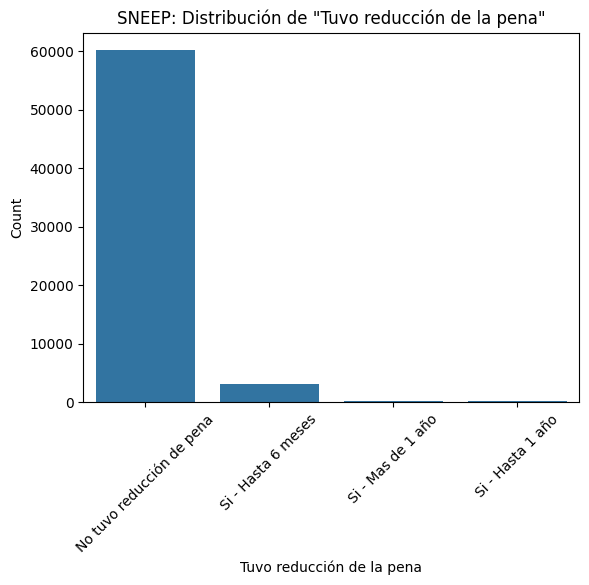

In [ ]:
# Graficamos la distribución de la columna tuvo_reduccion_pena_descripcion
sns.countplot(x='tuvo_reduccion_pena_descripcion', data=df_sneep_no_ids_csv)
plt.title("SNEEP: Distribución de \"Tuvo reducción de la pena\"")
plt.xticks(rotation=45) 
plt.xlabel("Tuvo reducción de la pena")
plt.ylabel("Count")
plt.show()

### Histogramas con moda, media, y mediana

In [106]:
moda = df_sneep_no_ids_csv['edad'].mode()[0]
media = df_sneep_no_ids_csv['edad'].mean()
mediana = df_sneep_no_ids_csv['edad'].median()
max_edad = df_sneep_no_ids_csv['edad'].max()
min_edad = df_sneep_no_ids_csv['edad'].min()

print(f"Datos respecto a la \"Edad\":\n\tModa:\t\t{moda}\n\tMedia:\t\t{media}\n\tMediana:\t{mediana}\n\tMáximo:\t\t{max_edad}\n\tMínimo:\t\t{min_edad}")

print(f"Cantidad de registros con edad igual a cero: {len(df_sneep_no_ids_csv[df_sneep_no_ids_csv['edad']==0])}")
print(f"Cantidad de registros con edad igual a máxima: {len(df_sneep_no_ids_csv[df_sneep_no_ids_csv['edad']==max_edad])}")

Datos respecto a la "Edad":
	Moda:		27
	Media:		35.490448078451685
	Mediana:	33.0
	Máximo:		93
	Mínimo:		0
Cantidad de registros con edad igual a cero: 1145
Cantidad de registros con edad igual a máxima: 1


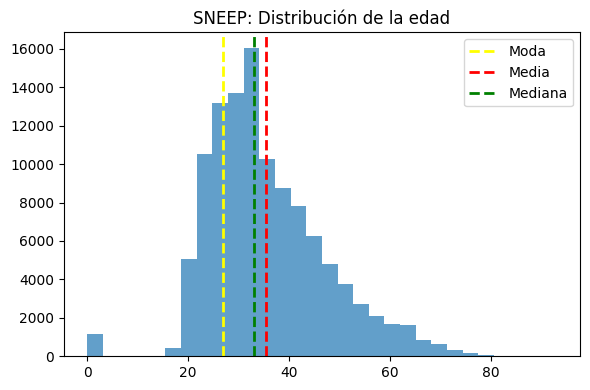

In [90]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(df_sneep_no_ids_csv['edad'], bins=30, alpha=0.7) # dibujar histograma
ax.axvline(df_sneep_no_ids_csv['edad'].mode()[0], color='yellow', ls='--', lw=2, label='Moda')
ax.axvline(df_sneep_no_ids_csv['edad'].mean(), color='red', ls='--', lw=2, label='Media')
ax.axvline(df_sneep_no_ids_csv['edad'].median(), color='green', ls='--', lw=2, label='Mediana')
ax.set_title('SNEEP: Distribución de la edad')
ax.legend()

plt.tight_layout()
plt.show()

In [61]:
moda = df_sneep_no_ids_csv['duracion_condena_anios'].mode()[0]
media = df_sneep_no_ids_csv['duracion_condena_anios'].mean()
mediana = df_sneep_no_ids_csv['duracion_condena_anios'].median()
max_edad = df_sneep_no_ids_csv['duracion_condena_anios'].max()
min_edad = df_sneep_no_ids_csv['duracion_condena_anios'].min()

print(f"Datos respecto a la \"duracion_condena_anios\":\n\tModa:\t\t{moda}\n\tMedia:\t\t{media}\n\tMediana:\t{mediana}\n\tMáximo:\t\t{max_edad}\n\tMínimo:\t\t{min_edad}")

print(f"Cantidad de registros con duracion_condena_anios igual a mínima: {len(df_sneep_no_ids_csv[df_sneep_no_ids_csv['duracion_condena_anios']==min_edad])}")
print(f"Cantidad de registros con duracion_condena_anios igual a máxima: {len(df_sneep_no_ids_csv[df_sneep_no_ids_csv['duracion_condena_anios']==max_edad])}")

Datos respecto a la "duracion_condena_anios":
	Moda:		0
	Media:		4.202720444416658
	Mediana:	3.0
	Máximo:		52
	Mínimo:		0
Cantidad de registros con duracion_condena_anios igual a mínima: 50324
Cantidad de registros con duracion_condena_anios igual a máxima: 1


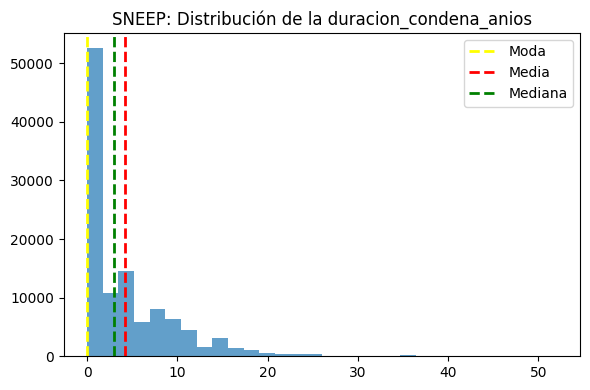

In [62]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(df_sneep_no_ids_csv['duracion_condena_anios'], bins=30, alpha=0.7) # dibujar histograma
ax.axvline(df_sneep_no_ids_csv['duracion_condena_anios'].mode()[0], color='yellow', ls='--', lw=2, label='Moda')
ax.axvline(df_sneep_no_ids_csv['duracion_condena_anios'].mean(), color='red', ls='--', lw=2, label='Media')
ax.axvline(df_sneep_no_ids_csv['duracion_condena_anios'].median(), color='green', ls='--', lw=2, label='Mediana')
ax.set_title('SNEEP: Distribución de la duracion_condena_anios')
ax.legend()

plt.tight_layout()
plt.show()

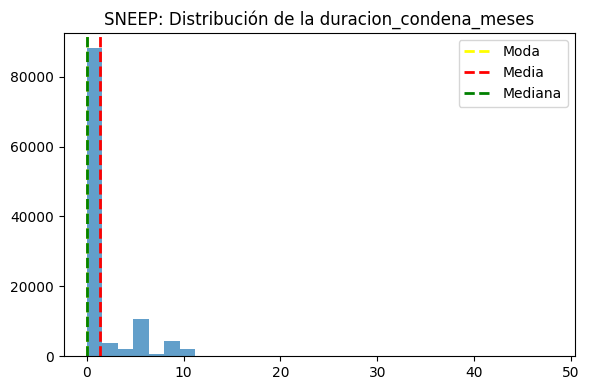

In [63]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(df_sneep_no_ids_csv['duracion_condena_meses'], bins=30, alpha=0.7) # dibujar histograma
ax.axvline(df_sneep_no_ids_csv['duracion_condena_meses'].mode()[0], color='yellow', ls='--', lw=2, label='Moda')
ax.axvline(df_sneep_no_ids_csv['duracion_condena_meses'].mean(), color='red', ls='--', lw=2, label='Media')
ax.axvline(df_sneep_no_ids_csv['duracion_condena_meses'].median(), color='green', ls='--', lw=2, label='Mediana')
ax.set_title('SNEEP: Distribución de la duracion_condena_meses')
ax.legend()

plt.tight_layout()
plt.show()

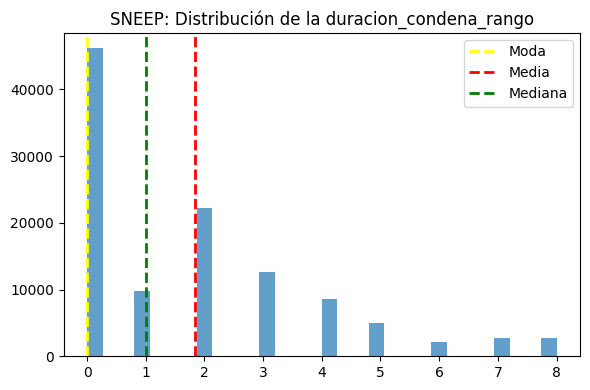

In [64]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(df_sneep_no_ids_csv['duracion_condena_rango'], bins=30, alpha=0.7) # dibujar histograma
ax.axvline(df_sneep_no_ids_csv['duracion_condena_rango'].mode()[0], color='yellow', ls='--', lw=2, label='Moda')
ax.axvline(df_sneep_no_ids_csv['duracion_condena_rango'].mean(), color='red', ls='--', lw=2, label='Media')
ax.axvline(df_sneep_no_ids_csv['duracion_condena_rango'].median(), color='green', ls='--', lw=2, label='Mediana')
ax.set_title('SNEEP: Distribución de la duracion_condena_rango')
ax.legend()

plt.tight_layout()
plt.show()

In [62]:
df_sneep_no_ids_csv["jurisdiccion_descripcion"].value_counts(dropna=False)

jurisdiccion_descripcion
PROVINCIAL - Buenos Aires                52177
PROVINCIAL - Córdoba                     12363
PROVINCIAL - Santa Fe                     7836
FEDERAL                                   6927
PROVINCIAL - Mendoza                      5955
NACIONAL                                  5276
PROVINCIAL - Salta                        3921
PROVINCIAL - Entre Rios                   2414
PROVINCIAL - Misiones                     1695
PROVINCIAL - San Juan                     1641
PROVINCIAL - Tucumán                      1375
PROVINCIAL - Rio Negro                    1251
PROVINCIAL - Chaco                        1244
PROVINCIAL - Corrientes                   1102
PROVINCIAL - Jujuy                        1062
PROVINCIAL - Santiago del Estero           935
PROVINCIAL - Formosa                       648
PROVINCIAL - Chubut                        621
PROVINCIAL - La Pampa                      607
PROVINCIAL - San Luis                      605
PROVINCIAL - Neuquén               

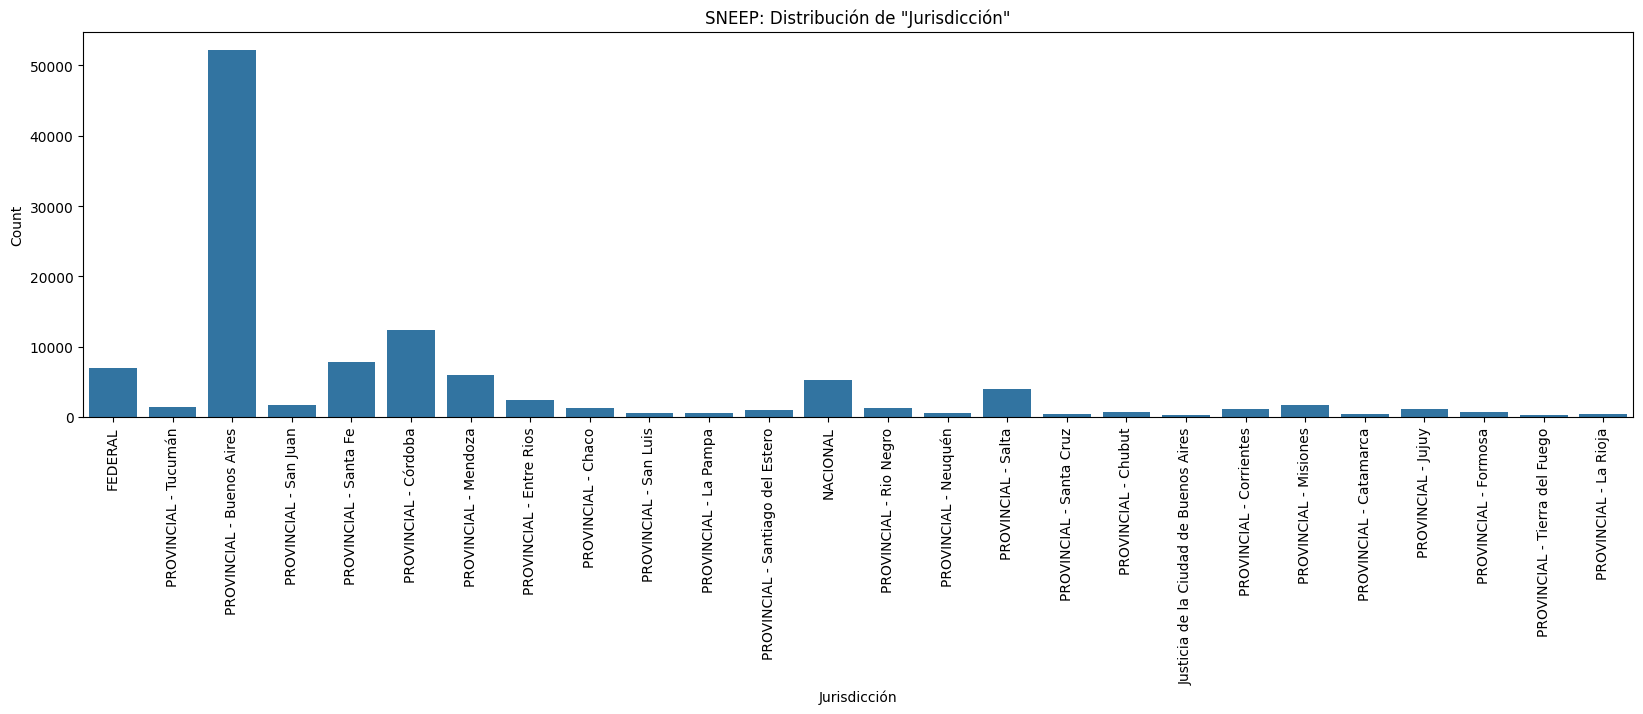

In [ ]:
# Graficamos la distribución de la columna jurisdiccion_descripcion
plt.figure(figsize=(20, 5))
sns.countplot(x='jurisdiccion_descripcion', data=df_sneep_no_ids_csv)
plt.title("SNEEP: Distribución de \"Jurisdicción\"")
plt.xticks(rotation=90) 
plt.xlabel("Jurisdicción")
plt.ylabel("Count")
plt.show()

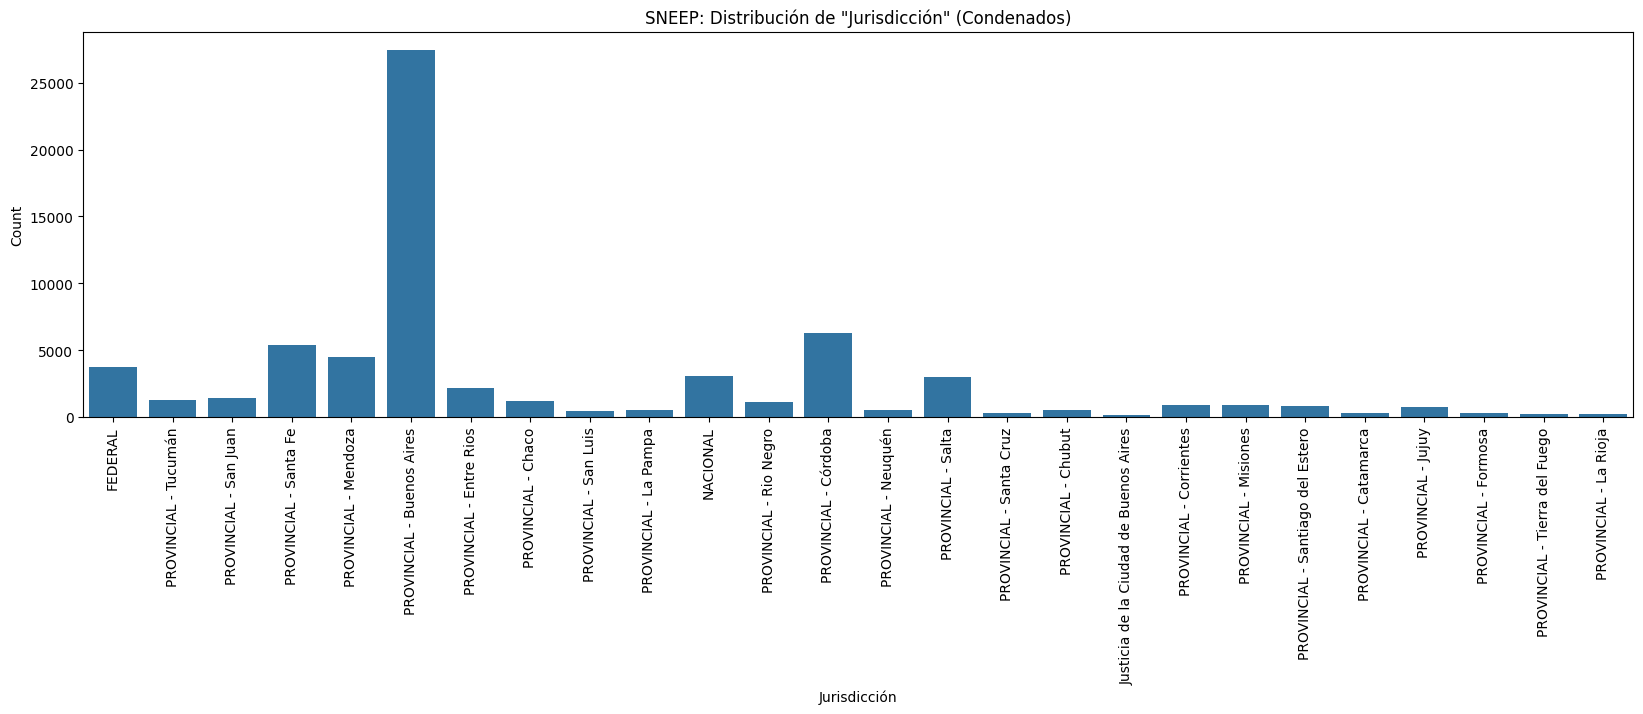

In [104]:
# Graficamos la distribución de la columna jurisdiccion_descripcion
plt.figure(figsize=(20, 5))
sns.countplot(x='jurisdiccion_descripcion', data=df_sneep_no_ids_csv_condenados)
plt.title("SNEEP: Distribución de \"Jurisdicción\" (Condenados)")
plt.xticks(rotation=90) 
plt.xlabel("Jurisdicción")
plt.ylabel("Count")
plt.show()

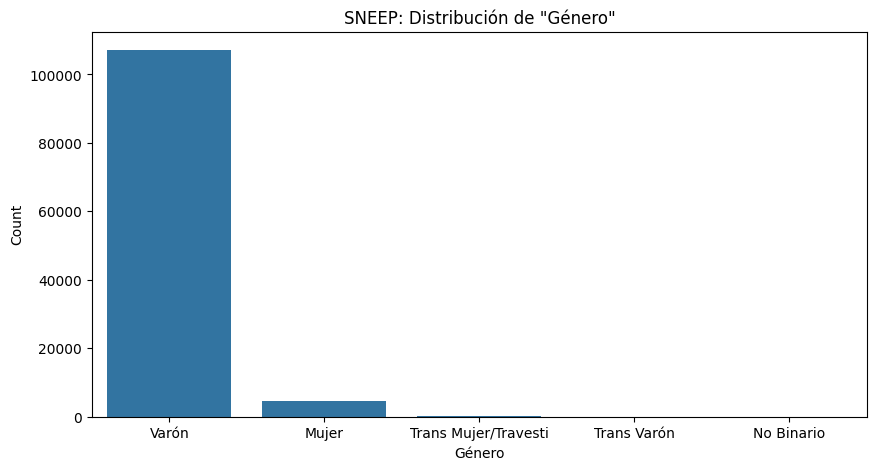

In [107]:
# Graficamos la distribución de la columna genero_descripcion
plt.figure(figsize=(10, 5))
sns.countplot(x='genero_descripcion', data=df_sneep_no_ids_csv)
plt.title("SNEEP: Distribución de \"Género\"")
plt.xticks(rotation=0)
plt.xlabel("Género")
plt.ylabel("Count")
plt.show()

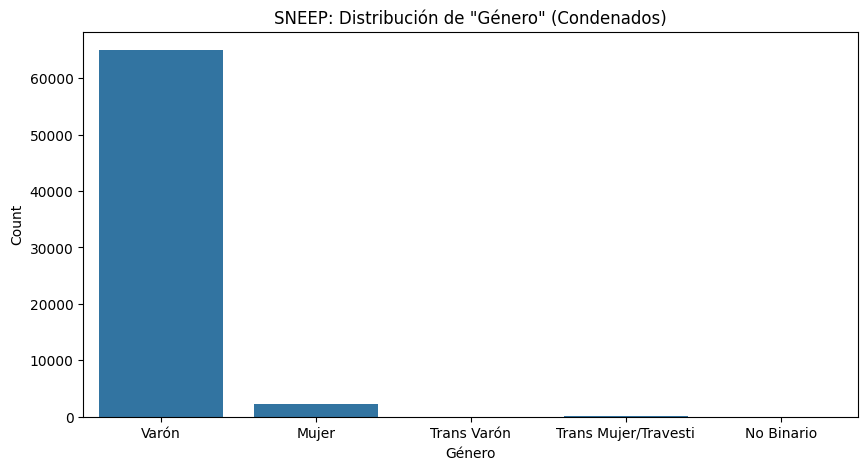

In [109]:
# Graficamos la distribución de la columna genero_descripcion
plt.figure(figsize=(10, 5))
sns.countplot(x='genero_descripcion', data=df_sneep_no_ids_csv_condenados)
plt.title("SNEEP: Distribución de \"Género\" (Condenados)")
plt.xticks(rotation=0) 
plt.xlabel("Género")
plt.ylabel("Count")
plt.show()

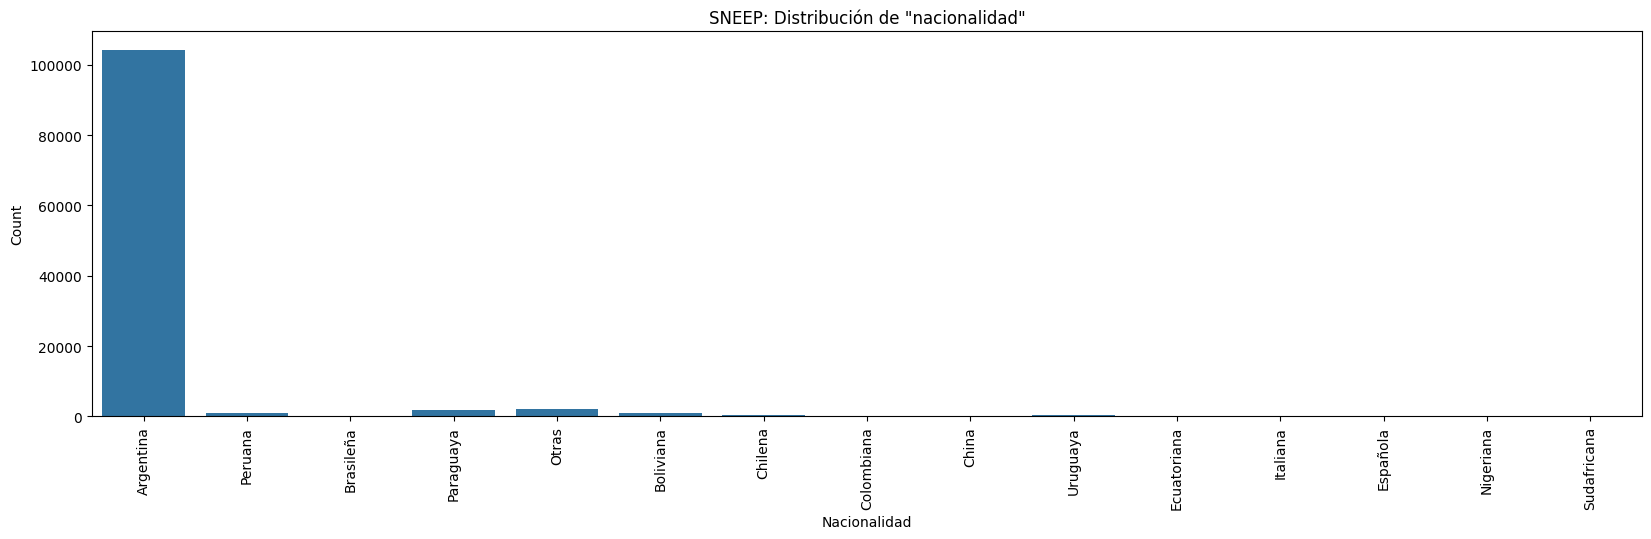

In [84]:
# Graficamos la distribución de la columna nacionalidad_descripcion
plt.figure(figsize=(20, 5))
sns.countplot(x='nacionalidad_descripcion', data=df_sneep_no_ids_csv)
plt.title("SNEEP: Distribución de \"nacionalidad\"")
plt.xticks(rotation=90) 
plt.xlabel("Nacionalidad")
plt.ylabel("Count")
plt.show()

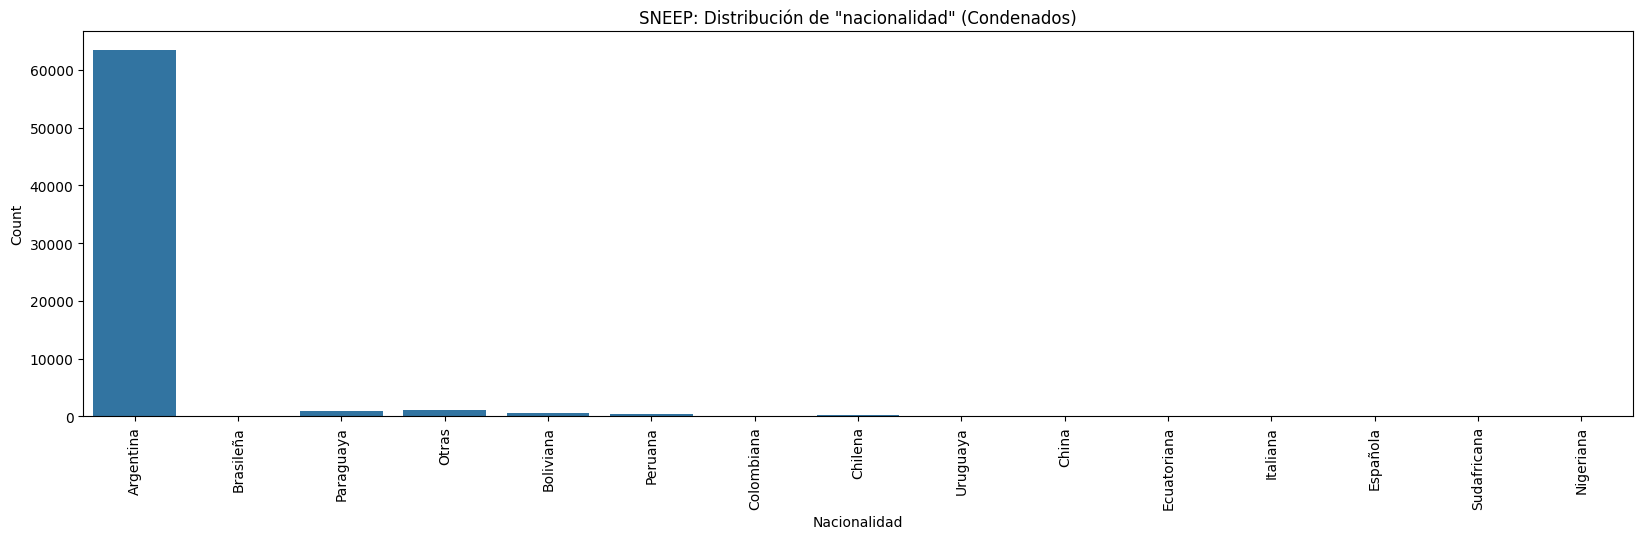

In [85]:
# Graficamos la distribución de la columna nacionalidad_descripcion
plt.figure(figsize=(20, 5))
sns.countplot(x='nacionalidad_descripcion', data=df_sneep_no_ids_csv_condenados)
plt.title("SNEEP: Distribución de \"nacionalidad\" (Condenados)")
plt.xticks(rotation=90) 
plt.xlabel("Nacionalidad")
plt.ylabel("Count")
plt.show()

### Crosstab

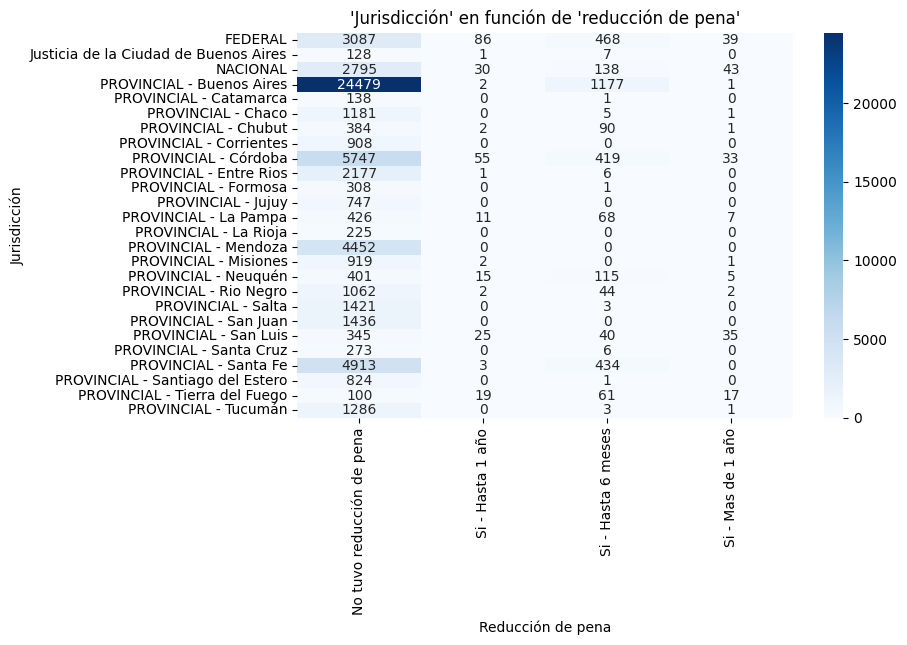

In [ ]:
# Graficamos la Jurisdicción en función de la reducción de pena
plt.figure(figsize=(8, 5))
cross_tab = pd.crosstab(df_sneep_no_ids_csv['jurisdiccion_descripcion'], df_sneep_no_ids_csv['tuvo_reduccion_pena_descripcion'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('\'Jurisdicción\' en función de la \'reducción de pena\'')
plt.xlabel('Reducción de pena')
plt.ylabel('Jurisdicción')
plt.show()

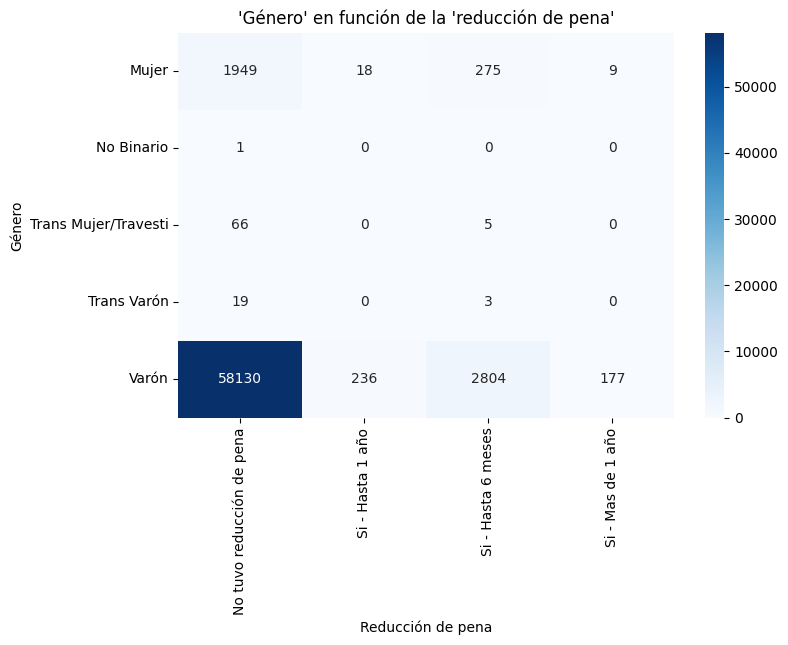

In [82]:
# Graficamos el Género en función de la reducción de pena
plt.figure(figsize=(8, 5))
cross_tab = pd.crosstab(df_sneep_no_ids_csv['genero_descripcion'], df_sneep_no_ids_csv['tuvo_reduccion_pena_descripcion'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('\'Género\' en función de la \'reducción de pena\'')
plt.xlabel('Reducción de pena')
plt.ylabel('Género')
plt.show()

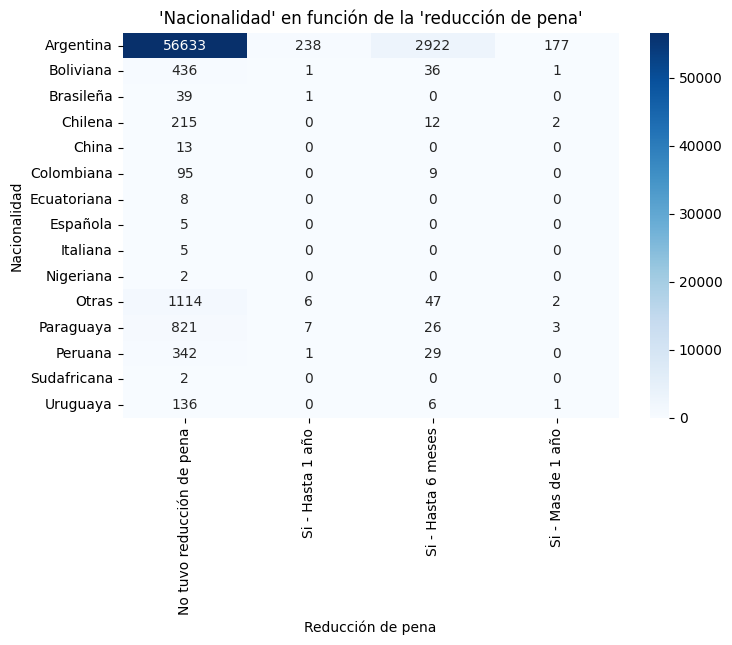

In [83]:
# Graficamos la nacionalidad en función de la reducción de pena
plt.figure(figsize=(8, 5))
cross_tab = pd.crosstab(df_sneep_no_ids_csv['nacionalidad_descripcion'], df_sneep_no_ids_csv['tuvo_reduccion_pena_descripcion'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('\'Nacionalidad\' en función de la \'reducción de pena\'')
plt.xlabel('Reducción de pena')
plt.ylabel('Nacionalidad')
plt.show()

### Barplot

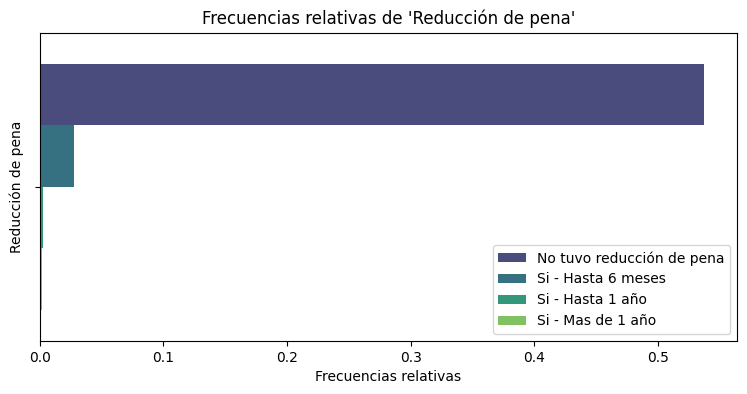

In [438]:
# Calcular frecuencias relativas
total = len(df_sneep_no_ids_csv)
relative_freq = df_sneep_no_ids_csv['tuvo_reduccion_pena_descripcion'].value_counts(dropna=False) / total

# Graficar frecuencias relativas
plt.figure(figsize=(9, 4))
sns.barplot(x=relative_freq.values, hue=relative_freq.index, palette='viridis')
plt.legend(loc="lower right")
plt.title('Frecuencias relativas de \'Reducción de pena\'')
plt.xlabel('Frecuencias relativas')
plt.ylabel('Reducción de pena')
plt.show()

# plt.legend(title=titulo, loc=loc)

### Corr plot

In [119]:
df_sneep_solo_ids_csv.corr()

,provincia_sneep_id,establecimiento_id,genero_id,nacionalidad_id,estado_civil_id,nivel_instruccion_id,ultima_situacion_laboral_id,capacitacion_laboral_al_ingresar_id,ultimo_lugar_residencia_id,ultima_provincia_residencia_sneep_id,...,es_reincidente_id,tiene_periodo_progresividad_id,reparticion_id,tuvo_salidas_transitorias_id,incorporado_reg_semi_libertad_id,participa_programa_prision_discontinua_id,participa_programa_semi_detencion_id,tuvo_reduccion_pena_id,provincia_id,ultima_provincia_residencia_id
provincia_sneep_id,1.000000,0.095381,-0.023743,-0.062927,-0.003283,0.097717,-0.021591,-0.177644,-0.017147,0.835334,...,0.150685,-0.012907,0.107565,0.126000,0.162965,0.146845,0.137519,0.148563,0.924451,0.876989
establecimiento_id,0.095381,1.000000,-0.024781,-0.093298,-0.016222,0.011183,0.035703,0.089561,-0.184780,0.038157,...,-0.033597,-0.019429,-0.075798,-0.063192,-0.046909,-0.037741,-0.036753,-0.038160,0.135786,0.121243
genero_id,-0.023743,-0.024781,1.000000,0.024793,-0.019854,0.062810,0.073301,0.126912,-0.022517,0.004679,...,-0.039896,-0.050041,0.049476,-0.038523,-0.043195,-0.045576,-0.048934,-0.045752,-0.015013,-0.011250
nacionalidad_id,-0.062927,-0.093298,0.024793,1.000000,-0.024915,0.038225,-0.063749,-0.042448,0.018784,-0.057016,...,-0.005101,-0.048662,0.038800,-0.025004,-0.020284,-0.020380,-0.021954,-0.019036,-0.083067,-0.088486
estado_civil_id,-0.003283,-0.016222,-0.019854,-0.024915,1.000000,-0.104153,-0.036523,0.062494,-0.015029,-0.004299,...,0.020872,0.047911,-0.023509,0.036171,0.021291,0.030579,0.027548,0.037117,0.009417,0.010775
nivel_instruccion_id,0.097717,0.011183,0.062810,0.038225,-0.104153,1.000000,-0.117535,0.003596,-0.042729,0.107706,...,-0.040663,-0.093795,0.110337,-0.001173,-0.016672,0.007259,-0.018803,-0.028547,0.076724,0.068901
ultima_situacion_laboral_id,-0.021591,0.035703,0.073301,-0.063749,-0.036523,-0.117535,1.000000,0.431427,-0.011962,-0.006699,...,0.005581,0.067411,0.024018,-0.013583,-0.023854,0.012751,0.010159,0.016173,-0.052816,-0.058840
capacitacion_laboral_al_ingresar_id,-0.177644,0.089561,0.126912,-0.042448,0.062494,0.003596,0.431427,1.000000,-0.019859,-0.124905,...,-0.008881,0.048939,0.023445,-0.002890,-0.010153,0.004669,-0.007092,-0.014133,-0.146322,-0.145984
ultimo_lugar_residencia_id,-0.017147,-0.184780,-0.022517,0.018784,-0.015029,-0.042729,-0.011962,-0.019859,1.000000,-0.006576,...,0.025755,0.010483,-0.007299,0.000022,0.017327,0.001040,0.004480,0.009309,-0.029744,-0.036267
ultima_provincia_residencia_sneep_id,0.835334,0.038157,0.004679,-0.057016,-0.004299,0.107706,-0.006699,-0.124905,-0.006576,1.000000,...,0.136770,-0.027914,0.211127,0.106334,0.136808,0.125725,0.116525,0.127749,0.804056,0.825062


<Axes: >

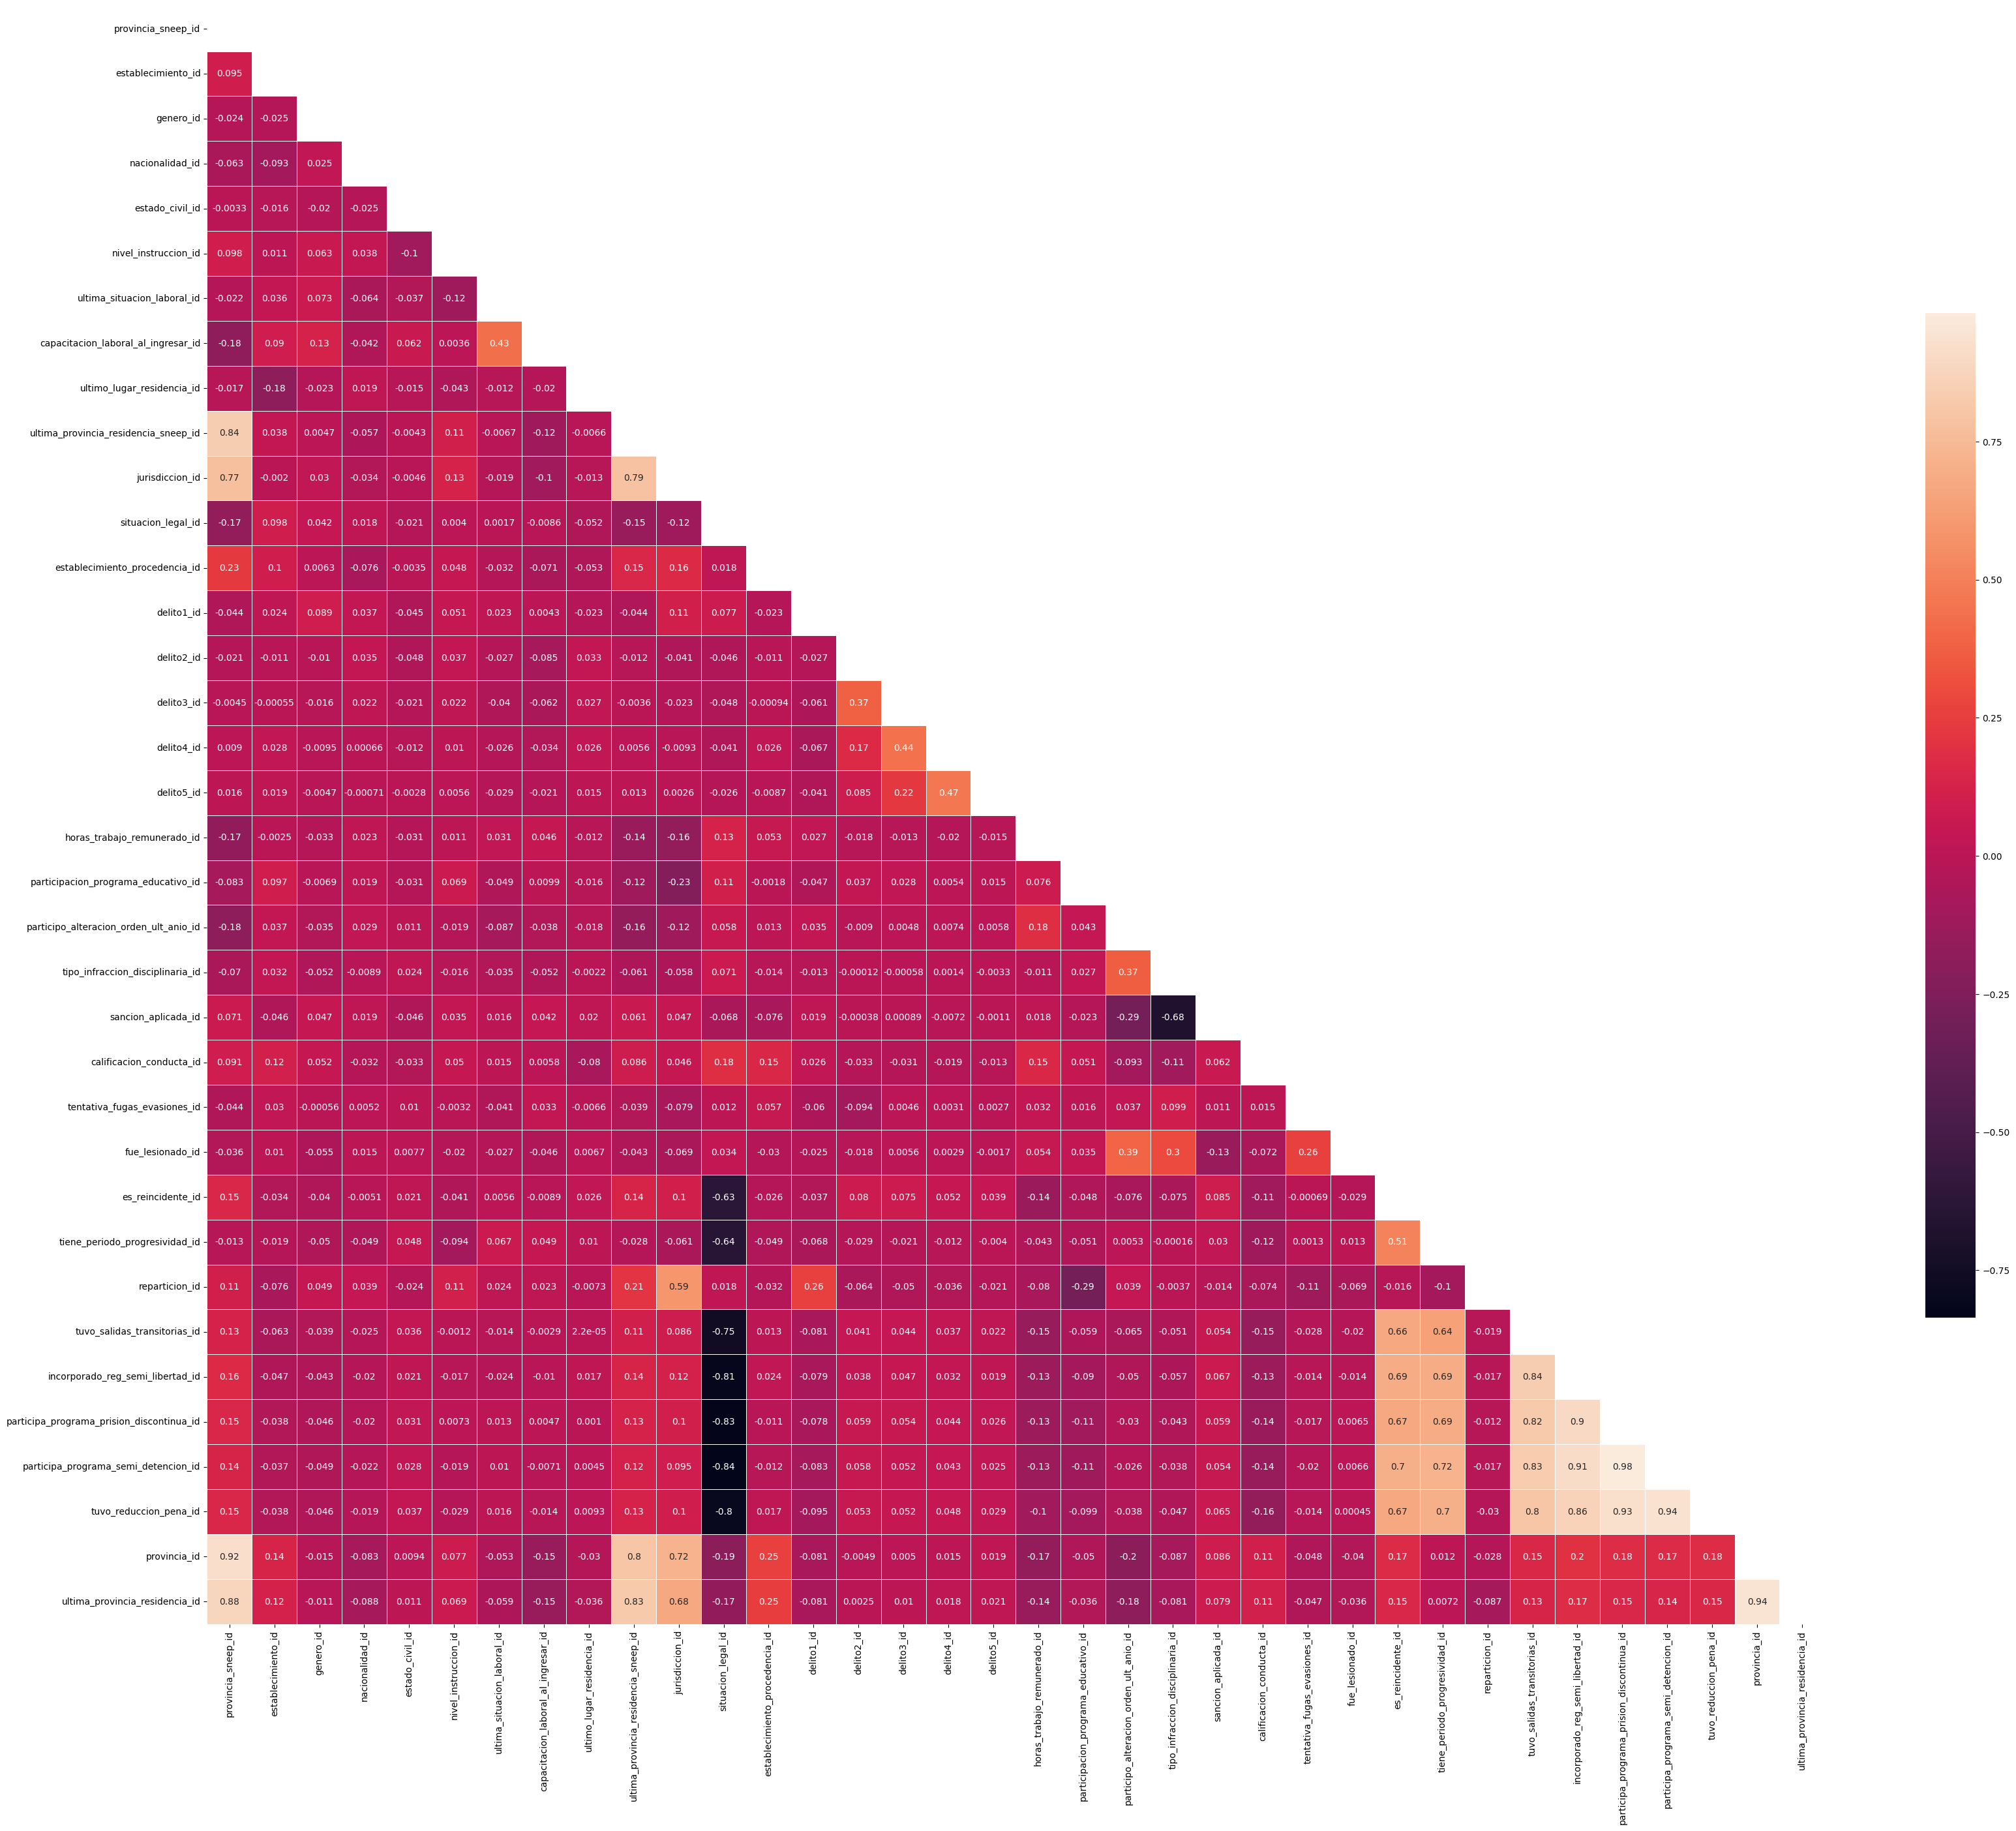

In [126]:
# Fuente: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = df_sneep_solo_ids_csv.corr()

# Se genera una máscara para la parte correspondiente al triángulo superior de la matriz
mask = np.triu(np.ones_like(corr, dtype=bool))

# Tamaño del gráfico de matplotlib
plt.figure(figsize=(40, 40))

sns.heatmap(corr, annot=True, mask=mask, square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Pairplots

<Figure size 2000x400 with 0 Axes>

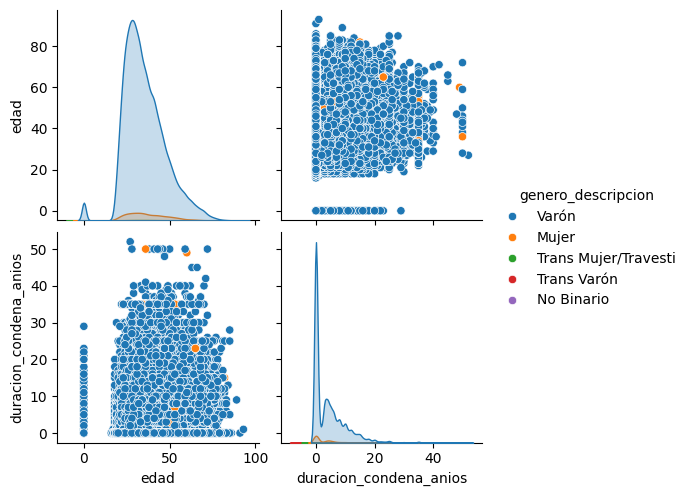

In [136]:
plt.figure(figsize=(20, 4))
sns.pairplot(data=df_sneep_no_ids_csv[["edad", "duracion_condena_anios", "genero_descripcion"]], hue='genero_descripcion')
# Graficar frecuencias relativas
# plt.title('Frecuencias relativas de \'Reducción de pena\'')
# plt.xlabel('Frecuencias relativas')
# plt.ylabel('Reducción de pena')
plt.show()

### Histograma con varias mediciones

In [ ]:
# Código provisto por la materia
# Función para graficar Histogramas, junto con skewness, kurtosis, media, varianza, y/o desvío estandar
def plot_histograma(data, column, figsize=(6, 3), bins=15, kde=True, mvd=True, snk=False):
    skewness = (data[column]).skew()
    kurtosis = (data[column]).kurt()
    media = (data[column]).mean()
    var = (data[column]).var()
    std = (data[column]).std()
    plt.figure(figsize=figsize)
    plt.grid(axis='y')
    sns.histplot(data[column], bins=bins, kde=kde)
    if snk:
        plt.figtext(0.7, 0.8, f'Asimetría: {skewness:.2f}', fontsize=10, color='blue')
        plt.figtext(0.715, 0.73, f'Curtosis: {kurtosis:.2f}', fontsize=10, color='blue')
    plt.axvline(media, color='red', linestyle='--', label='Media')
    if mvd:
        plt.figtext(0.15, 0.8, f'Media: {media:.2f}', fontsize=10, color='red')
        plt.figtext(0.15, 0.73, f'Var: {var:.2f}', fontsize=10, color='red')
        plt.figtext(0.15, 0.66, f'Std: {std:.2f}', fontsize=10, color='red')
    plt.title(f'Variable: {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Frecuencia')
    plt.show()
    
    return

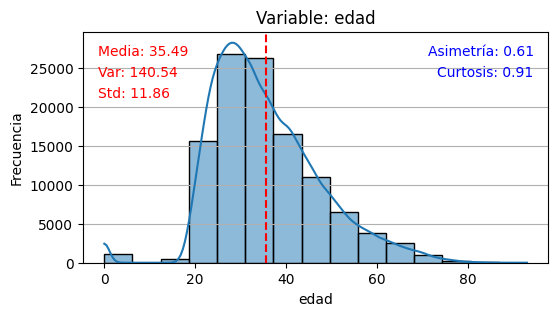

In [141]:
plot_histograma(df_sneep_no_ids_csv, 'edad', mvd= True, snk=True)

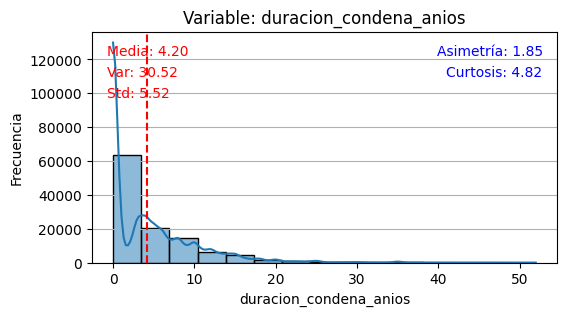

In [143]:
plot_histograma(df_sneep_no_ids_csv, 'duracion_condena_anios', mvd= True, snk=True)

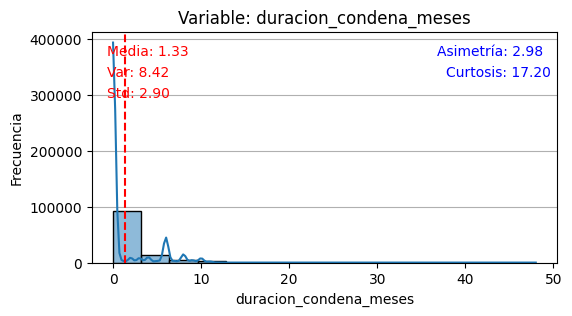

In [144]:
plot_histograma(df_sneep_no_ids_csv, 'duracion_condena_meses', mvd= True, snk=True)

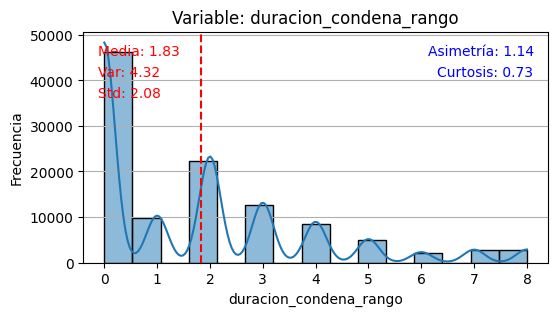

In [145]:
plot_histograma(df_sneep_no_ids_csv, 'duracion_condena_rango', mvd= True, snk=True)

### Boxplot

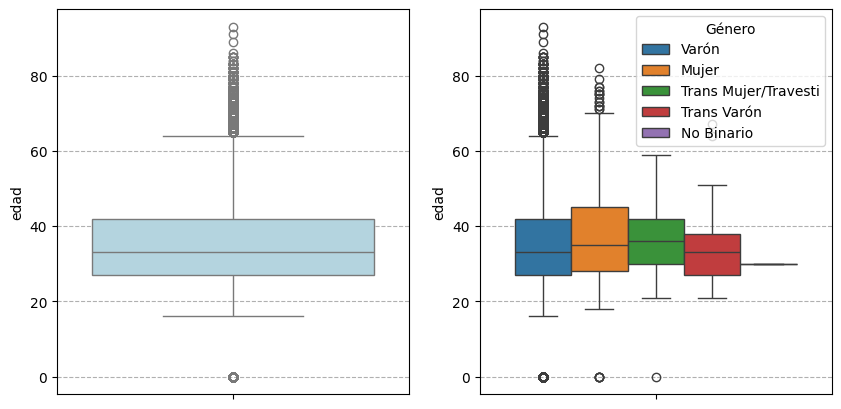

In [214]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(data=df_sneep_no_ids_csv, y='edad', color="lightblue", ax=ax[0])
sns.boxplot(data=df_sneep_no_ids_csv, y='edad', hue='genero_descripcion', ax=ax[1])

ax[0].grid(axis='y', ls='--')
ax[1].grid(axis='y', ls='--')
plt.legend(title='Género', loc='upper right')

plt.show()

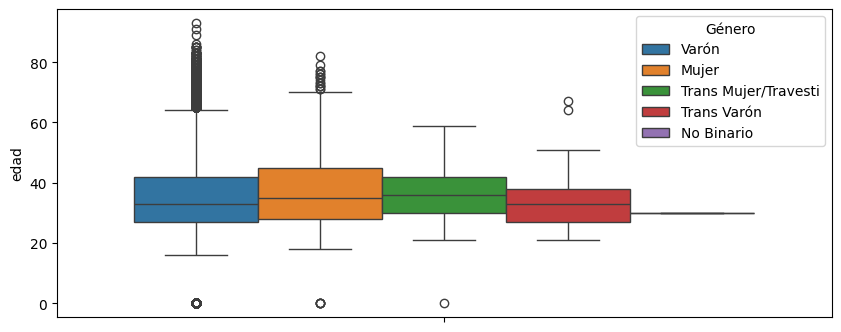

In [216]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_sneep_no_ids_csv, y='edad', hue='genero_descripcion')
plt.legend(title='Género', loc='upper right')
plt.show()

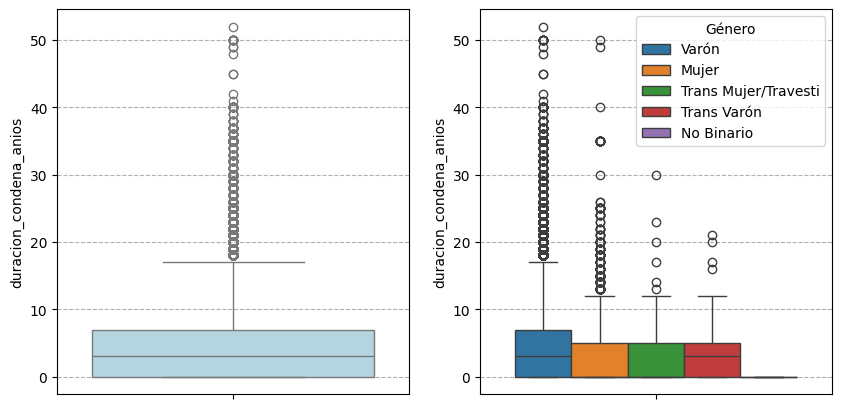

In [218]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(data=df_sneep_no_ids_csv, y='duracion_condena_anios', color="lightblue", ax=ax[0])
sns.boxplot(data=df_sneep_no_ids_csv, y='duracion_condena_anios', hue='genero_descripcion', ax=ax[1])

ax[0].grid(axis='y', ls='--')
ax[1].grid(axis='y', ls='--')
plt.legend(title='Género', loc='upper right')

plt.show()

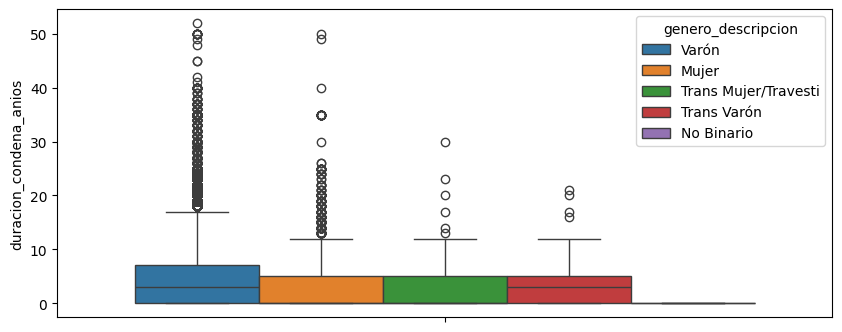

In [219]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_sneep_no_ids_csv, y='duracion_condena_anios', hue='genero_descripcion')
plt.show()

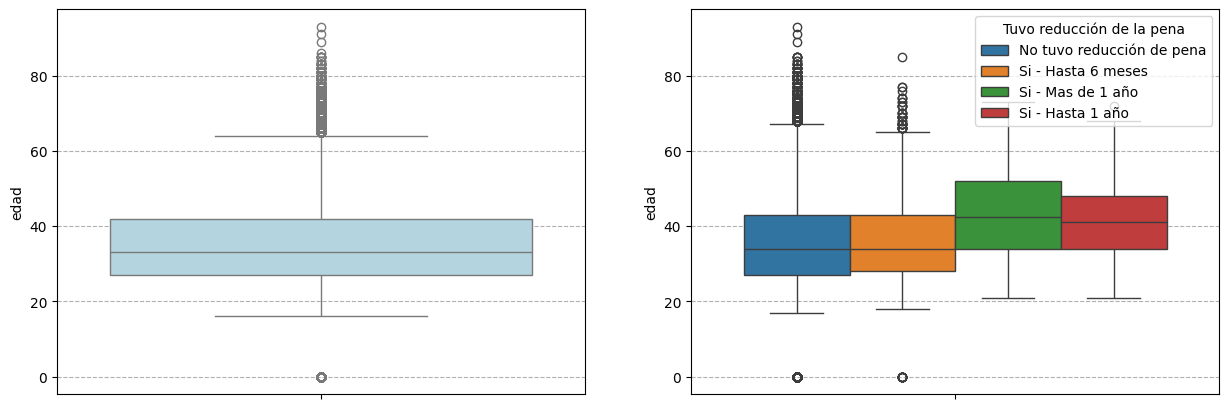

In [222]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=df_sneep_no_ids_csv, y='edad', color="lightblue", ax=ax[0])
sns.boxplot(data=df_sneep_no_ids_csv, y='edad', hue='tuvo_reduccion_pena_descripcion', ax=ax[1])

ax[0].grid(axis='y', ls='--')
ax[1].grid(axis='y', ls='--')
plt.legend(title='Tuvo reducción de la pena', loc='upper right')

plt.show()

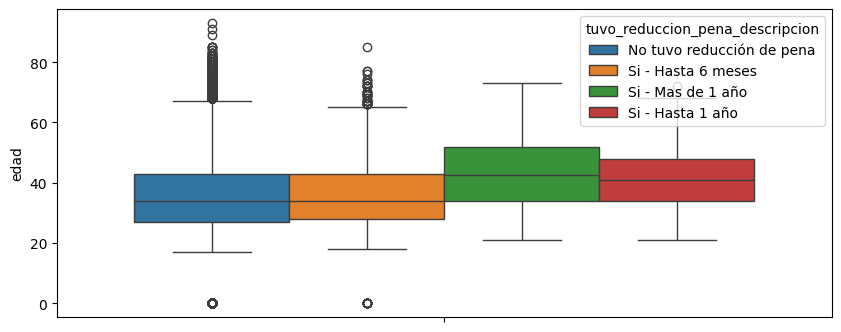

In [223]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_sneep_no_ids_csv, y='edad', hue='tuvo_reduccion_pena_descripcion')
plt.show()

### Entropía de Shannon en Categóricas

In [196]:
variables_categoricas_de_interes = [
    "tuvo_reduccion_pena_descripcion",
    "situacion_legal_descripcion",
    "nacionalidad_descripcion",
    "genero_descripcion",
    "jurisdiccion_descripcion",
    ### Correlación positiva con tuvo_reduccion_pena_descripcion
    "tuvo_salidas_transitorias_descripcion",
    "incorporado_reg_semi_libertad_descripcion",
    "participa_programa_prision_discontinua_descripcion",
    "participa_programa_semi_detencion_descripcion"
]

for var_interes in variables_categoricas_de_interes:
    value_counts = df_sneep_no_ids_csv[var_interes].value_counts()
    unique_values = df_sneep_no_ids_csv[var_interes].nunique()

    entr = entropy(pk=value_counts)
    max_entr_posible = math.log2(unique_values)

    print(f"""Variable {var_interes}
          Entropía:             {entr}
          Max entropía posible: {max_entr_posible}""")

Variable tuvo_reduccion_pena_descripcion
          Entropía:             0.23959259140693234
          Max entropía posible: 2.0
Variable situacion_legal_descripcion
          Entropía:             0.726125597943428
          Max entropía posible: 2.0
Variable nacionalidad_descripcion
          Entropía:             0.3433127754866698
          Max entropía posible: 3.9068905956085187
Variable genero_descripcion
          Entropía:             0.18696572563901298
          Max entropía posible: 2.321928094887362
Variable jurisdiccion_descripcion
          Entropía:             2.097721535600274
          Max entropía posible: 4.700439718141093
Variable tuvo_salidas_transitorias_descripcion
          Entropía:             0.27115522051311214
          Max entropía posible: 2.0
Variable incorporado_reg_semi_libertad_descripcion
          Entropía:             0.11732904325039176
          Max entropía posible: 2.0
Variable participa_programa_prision_discontinua_descripcion
          Entr